# Implementing a Neural Network
In this exercise we will develop a neural network with fully-connected layers to perform classification, and test it out on the CIFAR-10 dataset.

In [1]:
# A bit of setup

import numpy as np
import matplotlib.pyplot as plt

from cs231n.classifiers.neural_net import TwoLayerNet

from __future__ import print_function

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

def rel_error(x, y):
    """ returns relative error """
    return np.max(np.abs(x - y) / (np.maximum(1e-8, np.abs(x) + np.abs(y))))

We will use the class `TwoLayerNet` in the file `cs231n/classifiers/neural_net.py` to represent instances of our network. The network parameters are stored in the instance variable `self.params` where keys are string parameter names and values are numpy arrays. Below, we initialize toy data and a toy model that we will use to develop your implementation.

In [2]:
# Create a small net and some toy data to check your implementations.
# Note that we set the random seed for repeatable experiments.

input_size = 4
hidden_size = 10
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    return TwoLayerNet(input_size, hidden_size, num_classes, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
    return X, y

net = init_toy_model()
X, y = init_toy_data()

# Forward pass: compute scores
Open the file `cs231n/classifiers/neural_net.py` and look at the method `TwoLayerNet.loss`. This function is very similar to the loss functions you have written for the SVM and Softmax exercises: It takes the data and weights and computes the class scores, the loss, and the gradients on the parameters. 

Implement the first part of the forward pass which uses the weights and biases to compute the scores for all inputs.

In [3]:
scores = net.loss(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

Your scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

correct scores:
[[-0.81233741 -1.27654624 -0.70335995]
 [-0.17129677 -1.18803311 -0.47310444]
 [-0.51590475 -1.01354314 -0.8504215 ]
 [-0.15419291 -0.48629638 -0.52901952]
 [-0.00618733 -0.12435261 -0.15226949]]

Difference between your scores and correct scores:
3.680272087688147e-08


# Forward pass: compute loss
In the same function, implement the second part that computes the data and regularizaion loss.

In [4]:
loss, _ = net.loss(X, y, reg=0.05)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

Difference between your loss and correct loss:
1.794120407794253e-13


# Backward pass
Implement the rest of the function. This will compute the gradient of the loss with respect to the variables `W1`, `b1`, `W2`, and `b2`. Now that you (hopefully!) have a correctly implemented forward pass, you can debug your backward pass using a numeric gradient check:

In [5]:
from cs231n.gradient_check import eval_numerical_gradient

# Use numeric gradient checking to check your implementation of the backward pass.
# If your implementation is correct, the difference between the numeric and
# analytic gradients should be less than 1e-8 for each of W1, W2, b1, and b2.

loss, grads = net.loss(X, y, reg=0.05)

# these should all be less than 1e-8 or so
for param_name in grads:
    f = lambda W: net.loss(X, y, reg=0.05)[0]
    param_grad_num = eval_numerical_gradient(f, net.params[param_name], verbose=False)
    print('%s max relative error: %e' % (param_name, rel_error(param_grad_num, grads[param_name])))

W1 max relative error: 3.669858e-09
W2 max relative error: 3.440708e-09
b1 max relative error: 2.738423e-09
b2 max relative error: 4.447677e-11


# Train the network
To train the network we will use stochastic gradient descent (SGD), similar to the SVM and Softmax classifiers. Look at the function `TwoLayerNet.train` and fill in the missing sections to implement the training procedure. This should be very similar to the training procedure you used for the SVM and Softmax classifiers. You will also have to implement `TwoLayerNet.predict`, as the training process periodically performs prediction to keep track of accuracy over time while the network trains.

Once you have implemented the method, run the code below to train a two-layer network on toy data. You should achieve a training loss less than 0.2.

num _ train is : 5
Final training loss:  0.03671151433944709


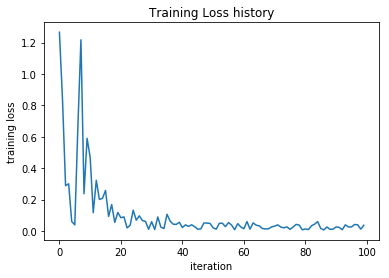

In [6]:
net = init_toy_model()
stats = net.train(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            num_iters=100, verbose=False)

print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

# Load the data
Now that you have implemented a two-layer network that passes gradient checks and works on toy data, it's time to load up our favorite CIFAR-10 data so we can use it to train a classifier on a real dataset.

In [7]:
from cs231n.data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
    """
    Load the CIFAR-10 dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.  
    """
    # Load the raw CIFAR-10 data
    cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


# Train a network
To train our network we will use SGD with momentum. In addition, we will adjust the learning rate with an exponential learning rate schedule as optimization proceeds; after each epoch, we will reduce the learning rate by multiplying it by a decay rate.

In [25]:
input_size = 32 * 32 * 3
hidden_size = 50
num_classes = 10
net = TwoLayerNet(input_size, hidden_size, num_classes)

# Train the network
stats = net.train(X_train, y_train, X_val, y_val,
            num_iters=1000, batch_size=500,
            learning_rate=1e-3, learning_rate_decay=0.95,
            reg=0.25, verbose=True)

# Predict on the validation set
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)



num _ train is : 49000
iteration 0 / 1000: loss 2.302991
iteration 100 / 1000: loss 1.949149
iteration 200 / 1000: loss 1.800133
iteration 300 / 1000: loss 1.704311
iteration 400 / 1000: loss 1.623114
iteration 500 / 1000: loss 1.567721
iteration 600 / 1000: loss 1.588303
iteration 700 / 1000: loss 1.537966
iteration 800 / 1000: loss 1.539117
iteration 900 / 1000: loss 1.555784
Validation accuracy:  0.47


# Debug the training
With the default parameters we provided above, you should get a validation accuracy of about 0.29 on the validation set. This isn't very good.

One strategy for getting insight into what's wrong is to plot the loss function and the accuracies on the training and validation sets during optimization.

Another strategy is to visualize the weights that were learned in the first layer of the network. In most neural networks trained on visual data, the first layer weights typically show some visible structure when visualized.

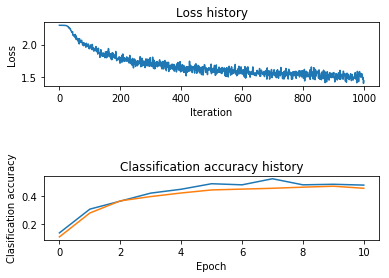

In [26]:
# Plot the loss function and train / validation accuracies
plt.subplot(3, 1, 1)
plt.plot(stats['loss_history'])
plt.title('Loss history')
plt.xlabel('Iteration')
plt.ylabel('Loss')

plt.subplot(3, 1, 3)
plt.plot(stats['train_acc_history'], label='train')
plt.plot(stats['val_acc_history'], label='val')
#plt.legend()
plt.title('Classification accuracy history')
plt.xlabel('Epoch')
plt.ylabel('Clasification accuracy')
plt.show()

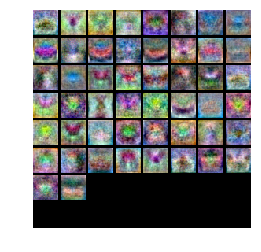

In [27]:
from cs231n.vis_utils import visualize_grid

# Visualize the weights of the network

def show_net_weights(net):
    W1 = net.params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

show_net_weights(net)

# Tune your hyperparameters

**What's wrong?**. Looking at the visualizations above, we see that the loss is decreasing more or less linearly, which seems to suggest that the learning rate may be too low. Moreover, there is no gap between the training and validation accuracy, suggesting that the model we used has low capacity, and that we should increase its size. On the other hand, with a very large model we would expect to see more overfitting, which would manifest itself as a very large gap between the training and validation accuracy.

**Tuning**. Tuning the hyperparameters and developing intuition for how they affect the final performance is a large part of using Neural Networks, so we want you to get a lot of practice. Below, you should experiment with different values of the various hyperparameters, including hidden layer size, learning rate, numer of training epochs, and regularization strength. You might also consider tuning the learning rate decay, but you should be able to get good performance using the default value.

**Approximate results**. You should be aim to achieve a classification accuracy of greater than 48% on the validation set. Our best network gets over 52% on the validation set.

**Experiment**: You goal in this exercise is to get as good of a result on CIFAR-10 as you can, with a fully-connected Neural Network. For every 1% above 52% on the Test set we will award you with one extra bonus point. Feel free implement your own techniques (e.g. PCA to reduce dimensionality, or adding dropout, or adding features to the solver, etc.).

In [33]:
best_net = None # store the best model into this 
val_acc = -999
#################################################################################
# TODO: Tune hyperparameters using the validation set. Store your best trained  #
# model in best_net.                                                            #
#                                                                               #
# To help debug your network, it may help to use visualizations similar to the  #
# ones we used above; these visualizations will have significant qualitative    #
# differences from the ones we saw above for the poorly tuned network.          #
#                                                                               #
# Tweaking hyperparameters by hand can be fun, but you might find it useful to  #
# write code to sweep through possible combinations of hyperparameters          #
# automatically like we did on the previous exercises.                          #
#################################################################################

for batch_sizei in range(100, 1000, 10):
    for learning_ratei in np.linspace(1e-4,1e-2, num = 100 ):
        for regi in np.linspace(0.1, 0.9, num = 10):
            net_now = TwoLayerNet(input_size, hidden_size, num_classes)
            # Train the network
            stats = net_now.train(X_train, y_train, X_val, y_val,
                        num_iters=1000, batch_size=batch_sizei,
                        learning_rate=learning_ratei, learning_rate_decay=0.95,
                        reg=regi, verbose=True)

            # Predict on the validation set
            val_acc_now = (net.predict(X_val) == y_val).mean()
            print('\n**********************************')
            print('batch_sizei is ',batch_sizei)
            print('learning_ratei is ',learning_ratei)
            print('regi is ',regi)
            print('Validation accuracy: ', val_acc)
            print('**********************************\n')
            if(val_acc < val_acc_now ):
                val_acc = val_acc_now
                best_net = net
#################################################################################
#                               END OF YOUR CODE                                #
#################################################################################

num _ train is : 49000
iteration 0 / 1000: loss 2.302750
iteration 100 / 1000: loss 2.302460
iteration 200 / 1000: loss 2.298888
iteration 300 / 1000: loss 2.270950
iteration 400 / 1000: loss 2.263200
iteration 500 / 1000: loss 2.164734
iteration 600 / 1000: loss 2.063029
iteration 700 / 1000: loss 2.056022
iteration 800 / 1000: loss 1.968434
iteration 900 / 1000: loss 2.049147

**********************************
batch_sizei is  100
learning_ratei is  0.0001
regi is  0.1
Validation accuracy:  -999
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302893
iteration 100 / 1000: loss 2.302463
iteration 200 / 1000: loss 2.299992
iteration 300 / 1000: loss 2.254425
iteration 400 / 1000: loss 2.237109
iteration 500 / 1000: loss 2.126905
iteration 600 / 1000: loss 2.025831
iteration 700 / 1000: loss 1.938636
iteration 800 / 1000: loss 1.954807
iteration 900 / 1000: loss 2.100063

**********************************
batch_sizei is  100
learning_ratei is  0.000

iteration 100 / 1000: loss 2.297064
iteration 200 / 1000: loss 2.171057
iteration 300 / 1000: loss 2.050508
iteration 400 / 1000: loss 1.913490
iteration 500 / 1000: loss 2.052269
iteration 600 / 1000: loss 1.995084
iteration 700 / 1000: loss 1.887991
iteration 800 / 1000: loss 1.871025
iteration 900 / 1000: loss 1.801823

**********************************
batch_sizei is  100
learning_ratei is  0.0002
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303542
iteration 100 / 1000: loss 2.300710
iteration 200 / 1000: loss 2.243015
iteration 300 / 1000: loss 2.102265
iteration 400 / 1000: loss 1.966279
iteration 500 / 1000: loss 1.862003
iteration 600 / 1000: loss 1.957037
iteration 700 / 1000: loss 1.904720
iteration 800 / 1000: loss 1.666635
iteration 900 / 1000: loss 1.825599

**********************************
batch_sizei is  100
learning_ratei is  0.0002
regi is  0.6333333333333333
Validation a


**********************************
batch_sizei is  100
learning_ratei is  0.00030000000000000003
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302730
iteration 100 / 1000: loss 2.174064
iteration 200 / 1000: loss 1.979482
iteration 300 / 1000: loss 1.936302
iteration 400 / 1000: loss 1.899490
iteration 500 / 1000: loss 1.888089
iteration 600 / 1000: loss 1.776141
iteration 700 / 1000: loss 1.718299
iteration 800 / 1000: loss 1.615740
iteration 900 / 1000: loss 1.623320

**********************************
batch_sizei is  100
learning_ratei is  0.0004
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302855
iteration 100 / 1000: loss 2.237702
iteration 200 / 1000: loss 2.069290
iteration 300 / 1000: loss 1.838041
iteration 400 / 1000: loss 1.863272
iteration 500 / 1000: loss 1.872870
iteration 600 / 1000: loss 1.766008
iteration 700 

iteration 800 / 1000: loss 1.538653
iteration 900 / 1000: loss 1.596924

**********************************
batch_sizei is  100
learning_ratei is  0.0005
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303468
iteration 100 / 1000: loss 2.191846
iteration 200 / 1000: loss 1.930829
iteration 300 / 1000: loss 1.932865
iteration 400 / 1000: loss 1.874792
iteration 500 / 1000: loss 1.700153
iteration 600 / 1000: loss 1.639007
iteration 700 / 1000: loss 1.637243
iteration 800 / 1000: loss 1.661882
iteration 900 / 1000: loss 1.630734

**********************************
batch_sizei is  100
learning_ratei is  0.0005
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303595
iteration 100 / 1000: loss 2.174439
iteration 200 / 1000: loss 2.105889
iteration 300 / 1000: loss 1.859643
iteration 400 / 1000: loss 1.738869


iteration 200 / 1000: loss 1.907126
iteration 300 / 1000: loss 1.900184
iteration 400 / 1000: loss 1.909426
iteration 500 / 1000: loss 1.638198
iteration 600 / 1000: loss 1.734864
iteration 700 / 1000: loss 1.669425
iteration 800 / 1000: loss 1.596386
iteration 900 / 1000: loss 1.659837

**********************************
batch_sizei is  100
learning_ratei is  0.0006000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302753
iteration 100 / 1000: loss 1.986113
iteration 200 / 1000: loss 1.912395
iteration 300 / 1000: loss 1.751642
iteration 400 / 1000: loss 1.514774
iteration 500 / 1000: loss 1.548237
iteration 600 / 1000: loss 1.503965
iteration 700 / 1000: loss 1.782964
iteration 800 / 1000: loss 1.415059
iteration 900 / 1000: loss 1.563625

**********************************
batch_sizei is  100
learning_ratei is  0.0007000000000000001
regi is  0.1
Validation accuracy:  0.47
*********************

iteration 100 / 1000: loss 2.042551
iteration 200 / 1000: loss 1.945686
iteration 300 / 1000: loss 1.889631
iteration 400 / 1000: loss 1.677874
iteration 500 / 1000: loss 1.852595
iteration 600 / 1000: loss 1.759215
iteration 700 / 1000: loss 1.686176
iteration 800 / 1000: loss 1.570927
iteration 900 / 1000: loss 1.747739

**********************************
batch_sizei is  100
learning_ratei is  0.0008
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303412
iteration 100 / 1000: loss 1.985711
iteration 200 / 1000: loss 1.708918
iteration 300 / 1000: loss 1.707157
iteration 400 / 1000: loss 1.814009
iteration 500 / 1000: loss 1.747371
iteration 600 / 1000: loss 1.597220
iteration 700 / 1000: loss 1.744735
iteration 800 / 1000: loss 1.703328
iteration 900 / 1000: loss 1.554822

**********************************
batch_sizei is  100
learning_ratei is  0.0008
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 1.976756
iteration 200 / 1000: loss 1.845633
iteration 300 / 1000: loss 1.782708
iteration 400 / 1000: loss 1.869250
iteration 500 / 1000: loss 1.861148
iteration 600 / 1000: loss 1.533981
iteration 700 / 1000: loss 1.807730
iteration 800 / 1000: loss 1.729983
iteration 900 / 1000: loss 1.730883

**********************************
batch_sizei is  100
learning_ratei is  0.0009000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302717
iteration 100 / 1000: loss 1.954938
iteration 200 / 1000: loss 1.870144
iteration 300 / 1000: loss 1.700683
iteration 400 / 1000: loss 1.429117
iteration 500 / 1000: loss 1.572368
iteration 600 / 1000: loss 1.505470
iteration 700 / 1000: loss 1.622476
iteration 800 / 1000: loss 1.806306
iteration 900 / 1000: loss 1.447557

**********************************
batch_sizei is  100
learning_ratei is  0.001
regi is  0.1
Validation accuracy:  0.47
*

iteration 100 / 1000: loss 1.888545
iteration 200 / 1000: loss 1.693995
iteration 300 / 1000: loss 1.606726
iteration 400 / 1000: loss 1.785804
iteration 500 / 1000: loss 1.580192
iteration 600 / 1000: loss 1.674541
iteration 700 / 1000: loss 1.753713
iteration 800 / 1000: loss 1.652483
iteration 900 / 1000: loss 1.570785

**********************************
batch_sizei is  100
learning_ratei is  0.0011
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303391
iteration 100 / 1000: loss 2.023595
iteration 200 / 1000: loss 1.814314
iteration 300 / 1000: loss 1.765961
iteration 400 / 1000: loss 1.612926
iteration 500 / 1000: loss 1.558018
iteration 600 / 1000: loss 1.718103
iteration 700 / 1000: loss 1.519636
iteration 800 / 1000: loss 1.532629
iteration 900 / 1000: loss 1.654481

**********************************
batch_sizei is  100
learning_ratei is  0.0011
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 2.040048
iteration 200 / 1000: loss 1.726384
iteration 300 / 1000: loss 1.839855
iteration 400 / 1000: loss 1.579902
iteration 500 / 1000: loss 2.011211
iteration 600 / 1000: loss 1.619917
iteration 700 / 1000: loss 1.906135
iteration 800 / 1000: loss 1.745599
iteration 900 / 1000: loss 1.800600

**********************************
batch_sizei is  100
learning_ratei is  0.0012000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302740
iteration 100 / 1000: loss 1.972855
iteration 200 / 1000: loss 1.786635
iteration 300 / 1000: loss 1.714827
iteration 400 / 1000: loss 1.664715
iteration 500 / 1000: loss 1.413139
iteration 600 / 1000: loss 1.743586
iteration 700 / 1000: loss 1.659406
iteration 800 / 1000: loss 1.562407
iteration 900 / 1000: loss 1.356094

**********************************
batch_sizei is  100
learning_ratei is  0.0013000000000000002
regi is  0.1
Validation a

iteration 900 / 1000: loss 1.508212

**********************************
batch_sizei is  100
learning_ratei is  0.0014000000000000002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303292
iteration 100 / 1000: loss 1.861664
iteration 200 / 1000: loss 1.749509
iteration 300 / 1000: loss 1.791233
iteration 400 / 1000: loss 1.820325
iteration 500 / 1000: loss 1.599318
iteration 600 / 1000: loss 1.550120
iteration 700 / 1000: loss 1.692531
iteration 800 / 1000: loss 1.464154
iteration 900 / 1000: loss 1.569935

**********************************
batch_sizei is  100
learning_ratei is  0.0014000000000000002
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303456
iteration 100 / 1000: loss 1.856701
iteration 200 / 1000: loss 1.962827
iteration 300 / 1000: loss 1.604483
iteration 400 / 1000: loss 1.687271
iterat

iteration 400 / 1000: loss 1.868968
iteration 500 / 1000: loss 1.773014
iteration 600 / 1000: loss 1.789066
iteration 700 / 1000: loss 1.725794
iteration 800 / 1000: loss 1.683914
iteration 900 / 1000: loss 1.619668

**********************************
batch_sizei is  100
learning_ratei is  0.0015
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303965
iteration 100 / 1000: loss 1.949089
iteration 200 / 1000: loss 1.692266
iteration 300 / 1000: loss 1.795023
iteration 400 / 1000: loss 1.734382
iteration 500 / 1000: loss 1.802166
iteration 600 / 1000: loss 1.879124
iteration 700 / 1000: loss 1.788598
iteration 800 / 1000: loss 1.713330
iteration 900 / 1000: loss 1.683891

**********************************
batch_sizei is  100
learning_ratei is  0.0015
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302695
iteration 100 /

iteration 200 / 1000: loss 1.752139
iteration 300 / 1000: loss 1.722544
iteration 400 / 1000: loss 1.823890
iteration 500 / 1000: loss 1.639749
iteration 600 / 1000: loss 1.558318
iteration 700 / 1000: loss 1.670777
iteration 800 / 1000: loss 1.570225
iteration 900 / 1000: loss 1.547160

**********************************
batch_sizei is  100
learning_ratei is  0.0017000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303302
iteration 100 / 1000: loss 1.869436
iteration 200 / 1000: loss 1.642286
iteration 300 / 1000: loss 1.945338
iteration 400 / 1000: loss 1.678122
iteration 500 / 1000: loss 1.794040
iteration 600 / 1000: loss 1.426733
iteration 700 / 1000: loss 1.688344
iteration 800 / 1000: loss 1.661164
iteration 900 / 1000: loss 1.689207

**********************************
batch_sizei is  100
learning_ratei is  0.0017000000000000001
regi is  0.4555555555555556
Validation accurac


**********************************
batch_sizei is  100
learning_ratei is  0.0018000000000000002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303861
iteration 100 / 1000: loss 1.955113
iteration 200 / 1000: loss 1.914377
iteration 300 / 1000: loss 1.726846
iteration 400 / 1000: loss 1.774954
iteration 500 / 1000: loss 1.670780
iteration 600 / 1000: loss 1.679896
iteration 700 / 1000: loss 1.566263
iteration 800 / 1000: loss 1.757331
iteration 900 / 1000: loss 1.608672

**********************************
batch_sizei is  100
learning_ratei is  0.0018000000000000002
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303996
iteration 100 / 1000: loss 1.779047
iteration 200 / 1000: loss 1.669126
iteration 300 / 1000: loss 1.765344
iteration 400 / 1000: loss 1.671628
iteration 500 / 1000: loss 1.870940
iterat

iteration 300 / 1000: loss 1.768055
iteration 400 / 1000: loss 1.754348
iteration 500 / 1000: loss 1.635512
iteration 600 / 1000: loss 1.719667
iteration 700 / 1000: loss 1.644126
iteration 800 / 1000: loss 1.734068
iteration 900 / 1000: loss 1.670282

**********************************
batch_sizei is  100
learning_ratei is  0.002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303149
iteration 100 / 1000: loss 1.707408
iteration 200 / 1000: loss 1.686935
iteration 300 / 1000: loss 1.527613
iteration 400 / 1000: loss 1.505320
iteration 500 / 1000: loss 1.731133
iteration 600 / 1000: loss 1.755782
iteration 700 / 1000: loss 1.580592
iteration 800 / 1000: loss 1.964329
iteration 900 / 1000: loss 1.650960

**********************************
batch_sizei is  100
learning_ratei is  0.002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000


iteration 100 / 1000: loss 2.044774
iteration 200 / 1000: loss 1.927192
iteration 300 / 1000: loss 2.115060
iteration 400 / 1000: loss 1.732191
iteration 500 / 1000: loss 1.918455
iteration 600 / 1000: loss 1.689325
iteration 700 / 1000: loss 1.742057
iteration 800 / 1000: loss 1.944594
iteration 900 / 1000: loss 1.807284

**********************************
batch_sizei is  100
learning_ratei is  0.0021
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303845
iteration 100 / 1000: loss 2.037280
iteration 200 / 1000: loss 1.799371
iteration 300 / 1000: loss 2.010421
iteration 400 / 1000: loss 1.742712
iteration 500 / 1000: loss 1.838463
iteration 600 / 1000: loss 1.924702
iteration 700 / 1000: loss 1.707311
iteration 800 / 1000: loss 1.808616
iteration 900 / 1000: loss 1.617610

**********************************
batch_sizei is  100
learning_ratei is  0.0021
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 1.873077
iteration 200 / 1000: loss 1.787455
iteration 300 / 1000: loss 2.045099
iteration 400 / 1000: loss 1.829194
iteration 500 / 1000: loss 1.736293
iteration 600 / 1000: loss 1.626336
iteration 700 / 1000: loss 1.570421
iteration 800 / 1000: loss 1.731334
iteration 900 / 1000: loss 1.804190

**********************************
batch_sizei is  100
learning_ratei is  0.0023
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303141
iteration 100 / 1000: loss 2.182990
iteration 200 / 1000: loss 1.983468
iteration 300 / 1000: loss 1.701746
iteration 400 / 1000: loss 1.623101
iteration 500 / 1000: loss 1.624422
iteration 600 / 1000: loss 1.865934
iteration 700 / 1000: loss 1.470817
iteration 800 / 1000: loss 2.156096
iteration 900 / 1000: loss 1.737525

**********************************
batch_sizei is  100
learning_ratei is  0.0023
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.797411
iteration 200 / 1000: loss 1.889070
iteration 300 / 1000: loss 1.806172
iteration 400 / 1000: loss 1.890733
iteration 500 / 1000: loss 1.822365
iteration 600 / 1000: loss 1.954377
iteration 700 / 1000: loss 2.033536
iteration 800 / 1000: loss 1.770651
iteration 900 / 1000: loss 1.840169

**********************************
batch_sizei is  100
learning_ratei is  0.0024
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303846
iteration 100 / 1000: loss 1.899616
iteration 200 / 1000: loss 1.809936
iteration 300 / 1000: loss 1.914925
iteration 400 / 1000: loss 1.936110
iteration 500 / 1000: loss 1.791598
iteration 600 / 1000: loss 1.948279
iteration 700 / 1000: loss 2.014747
iteration 800 / 1000: loss 1.863477
iteration 900 / 1000: loss 1.966891

**********************************
batch_sizei is  100
learning_ratei is  0.0024
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 1.794752
iteration 200 / 1000: loss 1.874222
iteration 300 / 1000: loss 1.841904
iteration 400 / 1000: loss 1.920462
iteration 500 / 1000: loss 1.746294
iteration 600 / 1000: loss 1.979412
iteration 700 / 1000: loss 1.871518
iteration 800 / 1000: loss 1.780398
iteration 900 / 1000: loss 1.776975

**********************************
batch_sizei is  100
learning_ratei is  0.0026
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303101
iteration 100 / 1000: loss 1.930482
iteration 200 / 1000: loss 1.897147
iteration 300 / 1000: loss 1.818484
iteration 400 / 1000: loss 1.833323
iteration 500 / 1000: loss 1.726859
iteration 600 / 1000: loss 1.682472
iteration 700 / 1000: loss 2.561711
iteration 800 / 1000: loss 1.671463
iteration 900 / 1000: loss 1.871880

**********************************
batch_sizei is  100
learning_ratei is  0.0026
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.929724
iteration 200 / 1000: loss 1.803185
iteration 300 / 1000: loss 2.107052
iteration 400 / 1000: loss 1.860270
iteration 500 / 1000: loss 1.884564
iteration 600 / 1000: loss 1.880499
iteration 700 / 1000: loss 2.319496
iteration 800 / 1000: loss 1.526873
iteration 900 / 1000: loss 1.874151

**********************************
batch_sizei is  100
learning_ratei is  0.0027
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303806
iteration 100 / 1000: loss 1.790314
iteration 200 / 1000: loss 2.036628
iteration 300 / 1000: loss 1.742312
iteration 400 / 1000: loss 2.060216
iteration 500 / 1000: loss 1.766088
iteration 600 / 1000: loss 2.240095
iteration 700 / 1000: loss 1.956842
iteration 800 / 1000: loss 1.775093
iteration 900 / 1000: loss 1.857658

**********************************
batch_sizei is  100
learning_ratei is  0.0027
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 1.858415
iteration 200 / 1000: loss 1.942922
iteration 300 / 1000: loss 2.131081
iteration 400 / 1000: loss 1.651919
iteration 500 / 1000: loss 1.994156
iteration 600 / 1000: loss 1.782057
iteration 700 / 1000: loss 1.790606
iteration 800 / 1000: loss 2.067833
iteration 900 / 1000: loss 1.886325

**********************************
batch_sizei is  100
learning_ratei is  0.0029
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303177
iteration 100 / 1000: loss 1.789637
iteration 200 / 1000: loss 2.102531
iteration 300 / 1000: loss 2.033021
iteration 400 / 1000: loss 2.522210
iteration 500 / 1000: loss 1.811359
iteration 600 / 1000: loss 1.867130
iteration 700 / 1000: loss 2.013705
iteration 800 / 1000: loss 1.650023
iteration 900 / 1000: loss 2.138631

**********************************
batch_sizei is  100
learning_ratei is  0.0029
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 2.113221
iteration 200 / 1000: loss 2.012815
iteration 300 / 1000: loss 1.790284
iteration 400 / 1000: loss 1.831776
iteration 500 / 1000: loss 1.978254
iteration 600 / 1000: loss 1.974835
iteration 700 / 1000: loss 1.915246
iteration 800 / 1000: loss 1.963366
iteration 900 / 1000: loss 1.849173

**********************************
batch_sizei is  100
learning_ratei is  0.003
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303834
iteration 100 / 1000: loss 2.001441
iteration 200 / 1000: loss 1.951887
iteration 300 / 1000: loss 2.158516
iteration 400 / 1000: loss 2.013127
iteration 500 / 1000: loss 2.029336
iteration 600 / 1000: loss 1.904045
iteration 700 / 1000: loss 1.889369
iteration 800 / 1000: loss 1.846705
iteration 900 / 1000: loss 2.036200

**********************************
batch_sizei is  100
learning_ratei is  0.003
regi is  0.8111111111111111
Validation acc

iteration 100 / 1000: loss 1.953435
iteration 200 / 1000: loss 1.838158
iteration 300 / 1000: loss 1.753277
iteration 400 / 1000: loss 2.191908
iteration 500 / 1000: loss 1.641681
iteration 600 / 1000: loss 2.184824
iteration 700 / 1000: loss 1.856820
iteration 800 / 1000: loss 1.668858
iteration 900 / 1000: loss 1.841186

**********************************
batch_sizei is  100
learning_ratei is  0.0032
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303120
iteration 100 / 1000: loss 1.808693
iteration 200 / 1000: loss 1.688681
iteration 300 / 1000: loss 1.902810
iteration 400 / 1000: loss 2.321435
iteration 500 / 1000: loss 1.893930
iteration 600 / 1000: loss 1.817990
iteration 700 / 1000: loss 1.946531
iteration 800 / 1000: loss 1.980302
iteration 900 / 1000: loss 1.744054

**********************************
batch_sizei is  100
learning_ratei is  0.0032
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 2.149968
iteration 200 / 1000: loss 1.776405
iteration 300 / 1000: loss 1.975301
iteration 400 / 1000: loss 1.924399
iteration 500 / 1000: loss 2.071298
iteration 600 / 1000: loss 1.934288
iteration 700 / 1000: loss 2.080754
iteration 800 / 1000: loss 1.956874
iteration 900 / 1000: loss 1.891084

**********************************
batch_sizei is  100
learning_ratei is  0.0033
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303858
iteration 100 / 1000: loss 1.974801
iteration 200 / 1000: loss 1.812910
iteration 300 / 1000: loss 1.981435
iteration 400 / 1000: loss 2.138217
iteration 500 / 1000: loss 2.055765
iteration 600 / 1000: loss 2.089904
iteration 700 / 1000: loss 1.848873
iteration 800 / 1000: loss 2.093627
iteration 900 / 1000: loss 1.888588

**********************************
batch_sizei is  100
learning_ratei is  0.0033
regi is  0.8111111111111111
Validation a

/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:108: RuntimeWarning: divide by zero encountered in log
  minus_log = - np.log(exp_choose_y)
/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:105: RuntimeWarning: overflow encountered in exp
  exp_scores = np.exp(scores)
/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:106: RuntimeWarning: invalid value encountered in true_divide
  exp_scores_divided =  exp_scores / np.reshape(np.sum(exp_scores, axis =1),(-1, 1))
/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:136: RuntimeWarning: invalid value encountered in true_divide
  exp_scoress /= np.reshape(np.sum(exp_scoress, axis = 1), (-1,1))
/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:81: RuntimeWarning: invalid value encountered in less
  XW1_plus_b1[XW1_plus_b1<0] = 0
/

iteration 400 / 1000: loss nan


/Users/hyunwoojo/Desktop/spring1617_assignment1/assignment1/cs231n/classifiers/neural_net.py:269: RuntimeWarning: invalid value encountered in less
  XW1_plus_b1[XW1_plus_b1<0] = 0


iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0035
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302828
iteration 100 / 1000: loss 1.802904
iteration 200 / 1000: loss 2.052155
iteration 300 / 1000: loss 2.028137
iteration 400 / 1000: loss 2.204021
iteration 500 / 1000: loss 2.245808
iteration 600 / 1000: loss 2.194611
iteration 700 / 1000: loss 1.804640
iteration 800 / 1000: loss 2.248411
iteration 900 / 1000: loss 2.203886

**********************************
batch_sizei is  100
learning_ratei is  0.0035
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303000
iteration 100 / 1000: loss 2.182209
iteration 200 / 1000: loss 2.076673
ite

iteration 100 / 1000: loss 2.080786
iteration 200 / 1000: loss 1.920714
iteration 300 / 1000: loss 2.105644
iteration 400 / 1000: loss 2.095281
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0036
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303714
iteration 100 / 1000: loss 1.861410
iteration 200 / 1000: loss 1.971960
iteration 300 / 1000: loss 2.127662
iteration 400 / 1000: loss 2.554498
iteration 500 / 1000: loss 2.088876
iteration 600 / 1000: loss 2.659845
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0036
regi is  0.7222222222222222
Validation accuracy:  0.47
*************************

iteration 100 / 1000: loss 1.952629
iteration 200 / 1000: loss 2.047954
iteration 300 / 1000: loss 2.321139
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0038
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303151
iteration 100 / 1000: loss 2.012898
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0038
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0039
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303957
iteration 100 / 1000: loss 2.003512
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0039
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0041
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303416
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0041
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303561
iteration 100 / 1000: loss nan
iteration 200

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004300000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302861
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004300000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
it

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0044
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303728
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0044
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004600000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303153
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004600000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0047
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303972
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0047
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004900000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303445
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.004900000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0051
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302852
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0051
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303009
iteration 100 / 1000: loss 

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.005200000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303723
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.005200000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303849
iteration 100 / 

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0054
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303188
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0054
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0055000000000000005
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303972
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0055000000000000005
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
i

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0057
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303413
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0057
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.005900000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302874
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.005900000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
it

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303716
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006200000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303122
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006200000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303285
iteration 100 / 1000: loss nan
iteration 200 / 

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006300000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.304044
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006300000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
ite

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006500000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303430
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.006500000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0067
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302878
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0067
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0068000000000000005
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303701
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0068000000000000005
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 100

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007000000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303156
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0071
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303962
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0071
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007300000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303435
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007300000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007500000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302909
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007500000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303012

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007600000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303680
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.007600000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0078000000000000005
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303118
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0078000000000000005
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 100

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0079
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303958
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0079
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0081
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303435
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0081
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303543
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0083
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302884
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0083
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303007
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss 

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0084
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303709
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0084
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303855
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0086
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303299
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0086
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0087
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302754
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0088
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302877
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 40

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0089
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303578
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0089
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303709
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0091
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303137
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0091
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0092
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303906
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0092
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302699
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss n

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0094
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303437
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0094
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303572
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0096
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302994
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0096
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0097
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303816
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.0097
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303978
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.009899999999999999
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303271
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.009899999999999999
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303440
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  100
learning_ratei is  0.01
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302757
iteration 100 / 1000: loss 2.302250
iteration 200 / 1000: loss 2.299158
iteration 300 / 1000: loss 2.242900
iteration 400 / 1000: loss 2.202008
iteration 500 / 1000: loss 2.154937
iteration 600 / 1000: loss 2.021036
iteration 700 / 1000: loss 2.056146
iteration 800 / 1000: loss 2.075547
iteration 900 / 1000: loss 2.037741

**********************************
batch_sizei is  110
learning_ratei is  0.0001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302925
iteration 100 / 1000: loss 2.302352
iteration 200 / 1000: loss 2.299988
iteration 300 / 1000: loss 2.260502
iteration 400 / 1000: loss 2.127933
iteration 5

iteration 600 / 1000: loss 1.840932
iteration 700 / 1000: loss 1.843918
iteration 800 / 1000: loss 1.756189
iteration 900 / 1000: loss 1.811121

**********************************
batch_sizei is  110
learning_ratei is  0.0002
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303456
iteration 100 / 1000: loss 2.299415
iteration 200 / 1000: loss 2.213444
iteration 300 / 1000: loss 2.106827
iteration 400 / 1000: loss 2.046650
iteration 500 / 1000: loss 1.816763
iteration 600 / 1000: loss 1.825193
iteration 700 / 1000: loss 1.773895
iteration 800 / 1000: loss 1.851579
iteration 900 / 1000: loss 1.733053

**********************************
batch_sizei is  110
learning_ratei is  0.0002
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303543
iteration 100 / 1000: loss 2.299520
iteration 200 / 1000: loss 2.238790


iteration 100 / 1000: loss 2.261890
iteration 200 / 1000: loss 2.019892
iteration 300 / 1000: loss 1.921426
iteration 400 / 1000: loss 2.032532
iteration 500 / 1000: loss 1.895732
iteration 600 / 1000: loss 1.806997
iteration 700 / 1000: loss 1.820635
iteration 800 / 1000: loss 1.729366
iteration 900 / 1000: loss 1.724230

**********************************
batch_sizei is  110
learning_ratei is  0.00030000000000000003
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302713
iteration 100 / 1000: loss 2.187220
iteration 200 / 1000: loss 1.997489
iteration 300 / 1000: loss 1.962022
iteration 400 / 1000: loss 1.808913
iteration 500 / 1000: loss 1.699500
iteration 600 / 1000: loss 1.806576
iteration 700 / 1000: loss 1.686644
iteration 800 / 1000: loss 1.743836
iteration 900 / 1000: loss 1.653627

**********************************
batch_sizei is  110
learning_ratei is  0.0004
regi is  0.1
Validation accuracy:  0.47

iteration 100 / 1000: loss 2.149961
iteration 200 / 1000: loss 1.923983
iteration 300 / 1000: loss 1.829305
iteration 400 / 1000: loss 1.856932
iteration 500 / 1000: loss 1.867906
iteration 600 / 1000: loss 1.680042
iteration 700 / 1000: loss 1.572101
iteration 800 / 1000: loss 1.619563
iteration 900 / 1000: loss 1.780314

**********************************
batch_sizei is  110
learning_ratei is  0.0005
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303401
iteration 100 / 1000: loss 2.179193
iteration 200 / 1000: loss 1.923509
iteration 300 / 1000: loss 1.803901
iteration 400 / 1000: loss 1.790378
iteration 500 / 1000: loss 1.701271
iteration 600 / 1000: loss 1.672256
iteration 700 / 1000: loss 1.793729
iteration 800 / 1000: loss 1.780101
iteration 900 / 1000: loss 1.621070

**********************************
batch_sizei is  110
learning_ratei is  0.0005
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 2.125357
iteration 200 / 1000: loss 1.870454
iteration 300 / 1000: loss 1.832855
iteration 400 / 1000: loss 1.687488
iteration 500 / 1000: loss 1.672372
iteration 600 / 1000: loss 1.743722
iteration 700 / 1000: loss 1.772692
iteration 800 / 1000: loss 1.810910
iteration 900 / 1000: loss 1.698346

**********************************
batch_sizei is  110
learning_ratei is  0.0006000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302745
iteration 100 / 1000: loss 1.987328
iteration 200 / 1000: loss 1.845726
iteration 300 / 1000: loss 1.716983
iteration 400 / 1000: loss 1.520113
iteration 500 / 1000: loss 1.581691
iteration 600 / 1000: loss 1.611859
iteration 700 / 1000: loss 1.615404
iteration 800 / 1000: loss 1.597179
iteration 900 / 1000: loss 1.475202

**********************************
batch_sizei is  110
learning_ratei is  0.0007000000000000001
regi is  0.1
Validation a

iteration 100 / 1000: loss 2.107806
iteration 200 / 1000: loss 1.906027
iteration 300 / 1000: loss 1.828885
iteration 400 / 1000: loss 1.625335
iteration 500 / 1000: loss 1.698403
iteration 600 / 1000: loss 1.510355
iteration 700 / 1000: loss 1.611318
iteration 800 / 1000: loss 1.663709
iteration 900 / 1000: loss 1.480183

**********************************
batch_sizei is  110
learning_ratei is  0.0008
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303431
iteration 100 / 1000: loss 1.986181
iteration 200 / 1000: loss 1.976652
iteration 300 / 1000: loss 1.806007
iteration 400 / 1000: loss 1.739110
iteration 500 / 1000: loss 1.679051
iteration 600 / 1000: loss 1.582563
iteration 700 / 1000: loss 1.709036
iteration 800 / 1000: loss 1.609991
iteration 900 / 1000: loss 1.669132

**********************************
batch_sizei is  110
learning_ratei is  0.0008
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 1.939425
iteration 200 / 1000: loss 1.834219
iteration 300 / 1000: loss 1.852260
iteration 400 / 1000: loss 1.775375
iteration 500 / 1000: loss 1.849296
iteration 600 / 1000: loss 1.800174
iteration 700 / 1000: loss 1.648030
iteration 800 / 1000: loss 1.587048
iteration 900 / 1000: loss 1.744613

**********************************
batch_sizei is  110
learning_ratei is  0.0009000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302723
iteration 100 / 1000: loss 1.935853
iteration 200 / 1000: loss 1.817289
iteration 300 / 1000: loss 1.609017
iteration 400 / 1000: loss 1.738470
iteration 500 / 1000: loss 1.763596
iteration 600 / 1000: loss 1.655765
iteration 700 / 1000: loss 1.544608
iteration 800 / 1000: loss 1.541859
iteration 900 / 1000: loss 1.613927

**********************************
batch_sizei is  110
learning_ratei is  0.001
regi is  0.1
Validation accuracy:  0.47
*

iteration 100 / 1000: loss 1.957764
iteration 200 / 1000: loss 1.682344
iteration 300 / 1000: loss 1.757412
iteration 400 / 1000: loss 1.736392
iteration 500 / 1000: loss 1.743801
iteration 600 / 1000: loss 1.605805
iteration 700 / 1000: loss 1.669934
iteration 800 / 1000: loss 1.768820
iteration 900 / 1000: loss 1.513821

**********************************
batch_sizei is  110
learning_ratei is  0.0011
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303450
iteration 100 / 1000: loss 1.892877
iteration 200 / 1000: loss 1.742468
iteration 300 / 1000: loss 1.666111
iteration 400 / 1000: loss 1.626614
iteration 500 / 1000: loss 1.735116
iteration 600 / 1000: loss 1.803180
iteration 700 / 1000: loss 1.684377
iteration 800 / 1000: loss 1.562096
iteration 900 / 1000: loss 1.586042

**********************************
batch_sizei is  110
learning_ratei is  0.0011
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 1.879649
iteration 200 / 1000: loss 1.919636
iteration 300 / 1000: loss 1.597736
iteration 400 / 1000: loss 1.718128
iteration 500 / 1000: loss 1.709934
iteration 600 / 1000: loss 1.741760
iteration 700 / 1000: loss 1.766645
iteration 800 / 1000: loss 1.751741
iteration 900 / 1000: loss 1.624074

**********************************
batch_sizei is  110
learning_ratei is  0.0012000000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302729
iteration 100 / 1000: loss 1.850980
iteration 200 / 1000: loss 1.608448
iteration 300 / 1000: loss 1.672696
iteration 400 / 1000: loss 1.757817
iteration 500 / 1000: loss 1.730174
iteration 600 / 1000: loss 1.487274
iteration 700 / 1000: loss 1.754506
iteration 800 / 1000: loss 1.493221
iteration 900 / 1000: loss 1.436552

**********************************
batch_sizei is  110
learning_ratei is  0.0013000000000000002
regi is  0.1
Validation a

iteration 900 / 1000: loss 1.591419

**********************************
batch_sizei is  110
learning_ratei is  0.0014000000000000002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303294
iteration 100 / 1000: loss 1.860827
iteration 200 / 1000: loss 1.831033
iteration 300 / 1000: loss 1.647357
iteration 400 / 1000: loss 1.692798
iteration 500 / 1000: loss 2.023802
iteration 600 / 1000: loss 1.830491
iteration 700 / 1000: loss 1.656047
iteration 800 / 1000: loss 1.697140
iteration 900 / 1000: loss 1.547878

**********************************
batch_sizei is  110
learning_ratei is  0.0014000000000000002
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303425
iteration 100 / 1000: loss 1.833714
iteration 200 / 1000: loss 1.900015
iteration 300 / 1000: loss 1.759525
iteration 400 / 1000: loss 1.694196
iterat

iteration 400 / 1000: loss 1.769041
iteration 500 / 1000: loss 1.749334
iteration 600 / 1000: loss 1.749444
iteration 700 / 1000: loss 1.688724
iteration 800 / 1000: loss 1.685971
iteration 900 / 1000: loss 1.647470

**********************************
batch_sizei is  110
learning_ratei is  0.0015
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303986
iteration 100 / 1000: loss 1.939618
iteration 200 / 1000: loss 1.868665
iteration 300 / 1000: loss 1.796340
iteration 400 / 1000: loss 1.741571
iteration 500 / 1000: loss 1.778750
iteration 600 / 1000: loss 1.853382
iteration 700 / 1000: loss 1.851092
iteration 800 / 1000: loss 1.743630
iteration 900 / 1000: loss 1.843189

**********************************
batch_sizei is  110
learning_ratei is  0.0015
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302738
iteration 100 /

iteration 200 / 1000: loss 1.675454
iteration 300 / 1000: loss 1.612669
iteration 400 / 1000: loss 1.594742
iteration 500 / 1000: loss 1.667932
iteration 600 / 1000: loss 1.646534
iteration 700 / 1000: loss 1.825094
iteration 800 / 1000: loss 1.713695
iteration 900 / 1000: loss 1.586964

**********************************
batch_sizei is  110
learning_ratei is  0.0017000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303259
iteration 100 / 1000: loss 1.802194
iteration 200 / 1000: loss 1.747459
iteration 300 / 1000: loss 1.829009
iteration 400 / 1000: loss 1.805110
iteration 500 / 1000: loss 1.683483
iteration 600 / 1000: loss 1.647849
iteration 700 / 1000: loss 1.921292
iteration 800 / 1000: loss 1.590713
iteration 900 / 1000: loss 1.591384

**********************************
batch_sizei is  110
learning_ratei is  0.0017000000000000001
regi is  0.4555555555555556
Validation accurac


**********************************
batch_sizei is  110
learning_ratei is  0.0018000000000000002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303836
iteration 100 / 1000: loss 2.033202
iteration 200 / 1000: loss 1.886586
iteration 300 / 1000: loss 1.631511
iteration 400 / 1000: loss 1.793263
iteration 500 / 1000: loss 1.906136
iteration 600 / 1000: loss 1.692290
iteration 700 / 1000: loss 1.962124
iteration 800 / 1000: loss 1.733793
iteration 900 / 1000: loss 1.889747

**********************************
batch_sizei is  110
learning_ratei is  0.0018000000000000002
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303949
iteration 100 / 1000: loss 1.896370
iteration 200 / 1000: loss 1.884653
iteration 300 / 1000: loss 1.957202
iteration 400 / 1000: loss 1.865453
iteration 500 / 1000: loss 1.636510
iterat

iteration 300 / 1000: loss 1.600770
iteration 400 / 1000: loss 1.839311
iteration 500 / 1000: loss 1.785331
iteration 600 / 1000: loss 1.699597
iteration 700 / 1000: loss 1.751103
iteration 800 / 1000: loss 1.427399
iteration 900 / 1000: loss 1.753831

**********************************
batch_sizei is  110
learning_ratei is  0.002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303140
iteration 100 / 1000: loss 1.965115
iteration 200 / 1000: loss 1.635961
iteration 300 / 1000: loss 1.665931
iteration 400 / 1000: loss 1.765357
iteration 500 / 1000: loss 1.721744
iteration 600 / 1000: loss 1.715923
iteration 700 / 1000: loss 1.739794
iteration 800 / 1000: loss 1.622291
iteration 900 / 1000: loss 1.797018

**********************************
batch_sizei is  110
learning_ratei is  0.002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000


iteration 100 / 1000: loss 1.847999
iteration 200 / 1000: loss 1.794355
iteration 300 / 1000: loss 1.645183
iteration 400 / 1000: loss 1.797234
iteration 500 / 1000: loss 1.681282
iteration 600 / 1000: loss 1.865961
iteration 700 / 1000: loss 2.208482
iteration 800 / 1000: loss 1.791598
iteration 900 / 1000: loss 1.837933

**********************************
batch_sizei is  110
learning_ratei is  0.0021
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303827
iteration 100 / 1000: loss 1.863533
iteration 200 / 1000: loss 1.949436
iteration 300 / 1000: loss 1.738884
iteration 400 / 1000: loss 1.727612
iteration 500 / 1000: loss 1.656653
iteration 600 / 1000: loss 1.924330
iteration 700 / 1000: loss 2.052868
iteration 800 / 1000: loss 1.700562
iteration 900 / 1000: loss 1.858550

**********************************
batch_sizei is  110
learning_ratei is  0.0021
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 1.745783
iteration 200 / 1000: loss 1.762993
iteration 300 / 1000: loss 1.872125
iteration 400 / 1000: loss 1.842065
iteration 500 / 1000: loss 1.869328
iteration 600 / 1000: loss 1.848654
iteration 700 / 1000: loss 1.914979
iteration 800 / 1000: loss 1.932831
iteration 900 / 1000: loss 1.935590

**********************************
batch_sizei is  110
learning_ratei is  0.0023
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303145
iteration 100 / 1000: loss 1.999854
iteration 200 / 1000: loss 1.826668
iteration 300 / 1000: loss 1.777537
iteration 400 / 1000: loss 1.967554
iteration 500 / 1000: loss 1.725556
iteration 600 / 1000: loss 1.636966
iteration 700 / 1000: loss 1.925517
iteration 800 / 1000: loss 1.710878
iteration 900 / 1000: loss 1.641356

**********************************
batch_sizei is  110
learning_ratei is  0.0023
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.882468
iteration 200 / 1000: loss 1.717815
iteration 300 / 1000: loss 1.912599
iteration 400 / 1000: loss 1.874489
iteration 500 / 1000: loss 1.932364
iteration 600 / 1000: loss 1.895036
iteration 700 / 1000: loss 1.905042
iteration 800 / 1000: loss 1.715248
iteration 900 / 1000: loss 1.665647

**********************************
batch_sizei is  110
learning_ratei is  0.0024
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303840
iteration 100 / 1000: loss 1.938140
iteration 200 / 1000: loss 1.988119
iteration 300 / 1000: loss 1.768625
iteration 400 / 1000: loss 1.834129
iteration 500 / 1000: loss 1.775185
iteration 600 / 1000: loss 1.827265
iteration 700 / 1000: loss 1.713256
iteration 800 / 1000: loss 1.774072
iteration 900 / 1000: loss 1.672171

**********************************
batch_sizei is  110
learning_ratei is  0.0024
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 2.192808
iteration 200 / 1000: loss 1.807707
iteration 300 / 1000: loss 2.438974
iteration 400 / 1000: loss 1.908466
iteration 500 / 1000: loss 1.870357
iteration 600 / 1000: loss 1.906812
iteration 700 / 1000: loss 1.937725
iteration 800 / 1000: loss 2.008305
iteration 900 / 1000: loss 1.561327

**********************************
batch_sizei is  110
learning_ratei is  0.0026
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303191
iteration 100 / 1000: loss 1.971390
iteration 200 / 1000: loss 1.683829
iteration 300 / 1000: loss 1.882311
iteration 400 / 1000: loss 1.632534
iteration 500 / 1000: loss 1.772862
iteration 600 / 1000: loss 1.656195
iteration 700 / 1000: loss 1.839008
iteration 800 / 1000: loss 1.591479
iteration 900 / 1000: loss 2.199071

**********************************
batch_sizei is  110
learning_ratei is  0.0026
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.894653
iteration 200 / 1000: loss 1.926476
iteration 300 / 1000: loss 1.957750
iteration 400 / 1000: loss 1.779661
iteration 500 / 1000: loss 1.843219
iteration 600 / 1000: loss 1.686774
iteration 700 / 1000: loss 1.653069
iteration 800 / 1000: loss 1.914839
iteration 900 / 1000: loss 1.962894

**********************************
batch_sizei is  110
learning_ratei is  0.0027
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303827
iteration 100 / 1000: loss 1.919893
iteration 200 / 1000: loss 2.022472
iteration 300 / 1000: loss 1.789237
iteration 400 / 1000: loss 1.779812
iteration 500 / 1000: loss 1.954008
iteration 600 / 1000: loss 1.692612
iteration 700 / 1000: loss 1.942339
iteration 800 / 1000: loss 2.220433
iteration 900 / 1000: loss 1.590564

**********************************
batch_sizei is  110
learning_ratei is  0.0027
regi is  0.8111111111111111
Validation a

iteration 100 / 1000: loss 1.736966
iteration 200 / 1000: loss 2.050115
iteration 300 / 1000: loss 1.502421
iteration 400 / 1000: loss 2.610888
iteration 500 / 1000: loss 1.816196
iteration 600 / 1000: loss 1.870680
iteration 700 / 1000: loss 1.747801
iteration 800 / 1000: loss 2.003307
iteration 900 / 1000: loss 2.116384

**********************************
batch_sizei is  110
learning_ratei is  0.0029
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303172
iteration 100 / 1000: loss 1.971513
iteration 200 / 1000: loss 2.049385
iteration 300 / 1000: loss 1.981272
iteration 400 / 1000: loss 1.728948
iteration 500 / 1000: loss 1.927966
iteration 600 / 1000: loss 1.839531
iteration 700 / 1000: loss 1.949900
iteration 800 / 1000: loss 1.661926
iteration 900 / 1000: loss 2.356751

**********************************
batch_sizei is  110
learning_ratei is  0.0029
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.830381
iteration 200 / 1000: loss 1.697350
iteration 300 / 1000: loss 1.791042
iteration 400 / 1000: loss 2.013502
iteration 500 / 1000: loss 1.743204
iteration 600 / 1000: loss 1.954367
iteration 700 / 1000: loss 2.240104
iteration 800 / 1000: loss 2.035400
iteration 900 / 1000: loss 1.785345

**********************************
batch_sizei is  110
learning_ratei is  0.003
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303852
iteration 100 / 1000: loss 2.017058
iteration 200 / 1000: loss 2.129224
iteration 300 / 1000: loss 2.061464
iteration 400 / 1000: loss 1.977852
iteration 500 / 1000: loss 1.837700
iteration 600 / 1000: loss 1.839093
iteration 700 / 1000: loss 2.012441
iteration 800 / 1000: loss 1.822646
iteration 900 / 1000: loss 2.001228

**********************************
batch_sizei is  110
learning_ratei is  0.003
regi is  0.8111111111111111
Validation acc

iteration 100 / 1000: loss 2.023071
iteration 200 / 1000: loss 2.044291
iteration 300 / 1000: loss 1.980570
iteration 400 / 1000: loss 1.846957
iteration 500 / 1000: loss 1.808947
iteration 600 / 1000: loss 1.732709
iteration 700 / 1000: loss 1.995870
iteration 800 / 1000: loss 2.629480
iteration 900 / 1000: loss 1.931538

**********************************
batch_sizei is  110
learning_ratei is  0.0032
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303184
iteration 100 / 1000: loss 1.917421
iteration 200 / 1000: loss 1.707654
iteration 300 / 1000: loss 1.900792
iteration 400 / 1000: loss 1.835786
iteration 500 / 1000: loss 1.908893
iteration 600 / 1000: loss 2.181000
iteration 700 / 1000: loss 1.963747
iteration 800 / 1000: loss 1.757332
iteration 900 / 1000: loss 1.770393

**********************************
batch_sizei is  110
learning_ratei is  0.0032
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.920939
iteration 200 / 1000: loss 1.879065
iteration 300 / 1000: loss 1.902427
iteration 400 / 1000: loss 1.968604
iteration 500 / 1000: loss 1.783620
iteration 600 / 1000: loss 2.078974
iteration 700 / 1000: loss 2.054435
iteration 800 / 1000: loss 1.785632
iteration 900 / 1000: loss 2.361155

**********************************
batch_sizei is  110
learning_ratei is  0.0033
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303822
iteration 100 / 1000: loss 1.836559
iteration 200 / 1000: loss 1.848154
iteration 300 / 1000: loss 1.824339
iteration 400 / 1000: loss 1.954456
iteration 500 / 1000: loss 1.935971
iteration 600 / 1000: loss 2.028608
iteration 700 / 1000: loss 1.934943
iteration 800 / 1000: loss 2.182390
iteration 900 / 1000: loss 1.767660

**********************************
batch_sizei is  110
learning_ratei is  0.0033
regi is  0.8111111111111111
Validation a

iteration 400 / 1000: loss 1.874872
iteration 500 / 1000: loss 2.101669
iteration 600 / 1000: loss 1.946597
iteration 700 / 1000: loss 1.829083
iteration 800 / 1000: loss 2.032711
iteration 900 / 1000: loss 1.762990

**********************************
batch_sizei is  110
learning_ratei is  0.0035
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303134
iteration 100 / 1000: loss 1.759916
iteration 200 / 1000: loss 1.892269
iteration 300 / 1000: loss 1.875466
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0035
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303334
iteration 100 / 1000: loss 1.8


**********************************
batch_sizei is  110
learning_ratei is  0.0036
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303832
iteration 100 / 1000: loss 2.097744
iteration 200 / 1000: loss 1.933938
iteration 300 / 1000: loss 1.706608
iteration 400 / 1000: loss 1.981171
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0036
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303996
iteration 100 / 1000: loss 2.026253
iteration 200 / 1000: loss 1.840079
iteration 300 / 1000: loss 2.285094
iteration 400 / 1000: loss 2.307632
iteration 500 / 1000: loss 2.875117
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0038
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303291
iteration 100 / 1000: loss 2.183645
iteration 200 / 1000: loss 2.716878
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0038
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303411
iteration 100 / 1000: loss 2.042301
iteration 200 / 1000: loss 3.800391
iteration 300 / 1000: loss 2.294450
iteration 400 / 1000: loss 3.283911
iteration 500 

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0039
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302766
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302888
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0041
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303577
iteration 100 / 1000: loss 1.910917
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0041
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303674
iteration 100 / 1000: loss 1.759455
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
ite

/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0041
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302723
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004200000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302892
iteration 100 / 1000: loss 2.

iteration 100 / 1000: loss 1.942822
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004300000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303547
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004300000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ 

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0045000000000000005
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303005
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0045000000000000005
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004600000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303838
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004600000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0048000000000000004
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303275
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0048000000000000004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 100

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.004900000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302896

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0051
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303582
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0051
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303708
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005300000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303013
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005300000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303205
iteration 100 / 1000: loss nan
iteration 200 /

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0054
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303800
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0054
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.304004
iteration 100 / 1000: loss nan
iteration 200

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005600000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303292
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005600000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0057
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302746
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0058000000000000005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3028

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005900000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303564
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.005900000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0061
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303019
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0061
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303143
iteration 100 / 1000: loss nan
iteration 20

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006200000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303844
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006200000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303972
iteration 100 / 

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0064
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303258
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0064
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006500000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302716
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006600000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0067
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303572
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0067
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006900000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303023
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.006900000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ trai

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007000000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303861
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007000000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007200000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303321
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007200000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007300000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302736
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0074
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.30286

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007500000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303529
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.007500000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0077
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303009
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0077
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0078000000000000005
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303870
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0078000000000000005
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ tra

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.008
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303292
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.008
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303417
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 /

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0081
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302729
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.008199999999999999
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302891
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss na

iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0083
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303591
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0083
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303698
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500


**********************************
batch_sizei is  110
learning_ratei is  0.0085
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302968
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0085
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303156
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 90

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0086
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303964
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0086
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0088
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303448
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0088
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303545
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.009
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302882
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.009
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303019
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss na

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0091
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303803
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0091
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0093
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303331
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0093
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303445
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0094
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302705
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0095
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302924
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 80

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0096
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303724
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0096
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0098
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303153
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.0098
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303238
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.009899999999999999
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303969
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  110
learning_ratei is  0.009899999999999999
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302733
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan


iteration 200 / 1000: loss 2.297087
iteration 300 / 1000: loss 2.264846
iteration 400 / 1000: loss 2.221797
iteration 500 / 1000: loss 2.165388
iteration 600 / 1000: loss 2.138223
iteration 700 / 1000: loss 2.026126
iteration 800 / 1000: loss 1.971644
iteration 900 / 1000: loss 1.949779

**********************************
batch_sizei is  120
learning_ratei is  0.0001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303441
iteration 100 / 1000: loss 2.303001
iteration 200 / 1000: loss 2.300653
iteration 300 / 1000: loss 2.263601
iteration 400 / 1000: loss 2.174845
iteration 500 / 1000: loss 2.119018
iteration 600 / 1000: loss 2.029514
iteration 700 / 1000: loss 1.993569
iteration 800 / 1000: loss 2.000586
iteration 900 / 1000: loss 1.971556

**********************************
batch_sizei is  120
learning_ratei is  0.0001
regi is  0.5444444444444445
Validation accuracy:  0.47
*********************

iteration 100 / 1000: loss 2.299675
iteration 200 / 1000: loss 2.172436
iteration 300 / 1000: loss 1.986263
iteration 400 / 1000: loss 2.034088
iteration 500 / 1000: loss 1.939872
iteration 600 / 1000: loss 1.954361
iteration 700 / 1000: loss 1.892631
iteration 800 / 1000: loss 1.760347
iteration 900 / 1000: loss 1.784945

**********************************
batch_sizei is  120
learning_ratei is  0.0002
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302749
iteration 100 / 1000: loss 2.255443
iteration 200 / 1000: loss 2.075906
iteration 300 / 1000: loss 1.926327
iteration 400 / 1000: loss 1.820963
iteration 500 / 1000: loss 1.918900
iteration 600 / 1000: loss 1.687743
iteration 700 / 1000: loss 1.708786
iteration 800 / 1000: loss 1.787989
iteration 900 / 1000: loss 1.719279

**********************************
batch_sizei is  120
learning_ratei is  0.00030000000000000003
regi is  0.1
Validation accuracy:  0.47

iteration 100 / 1000: loss 2.160889
iteration 200 / 1000: loss 2.105271
iteration 300 / 1000: loss 1.941311
iteration 400 / 1000: loss 1.817924
iteration 500 / 1000: loss 1.761195
iteration 600 / 1000: loss 1.808947
iteration 700 / 1000: loss 1.714732
iteration 800 / 1000: loss 1.658147
iteration 900 / 1000: loss 1.661060

**********************************
batch_sizei is  120
learning_ratei is  0.0004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303412
iteration 100 / 1000: loss 2.185195
iteration 200 / 1000: loss 1.981419
iteration 300 / 1000: loss 1.885930
iteration 400 / 1000: loss 1.859235
iteration 500 / 1000: loss 1.789952
iteration 600 / 1000: loss 1.937155
iteration 700 / 1000: loss 1.829693
iteration 800 / 1000: loss 1.723735
iteration 900 / 1000: loss 1.716228

**********************************
batch_sizei is  120
learning_ratei is  0.0004
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 2.161035
iteration 200 / 1000: loss 2.021083
iteration 300 / 1000: loss 1.936298
iteration 400 / 1000: loss 1.903325
iteration 500 / 1000: loss 1.757140
iteration 600 / 1000: loss 1.818649
iteration 700 / 1000: loss 1.812638
iteration 800 / 1000: loss 1.788153
iteration 900 / 1000: loss 1.597940

**********************************
batch_sizei is  120
learning_ratei is  0.0005
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302725
iteration 100 / 1000: loss 2.106293
iteration 200 / 1000: loss 1.922763
iteration 300 / 1000: loss 1.709933
iteration 400 / 1000: loss 1.708192
iteration 500 / 1000: loss 1.640029
iteration 600 / 1000: loss 1.579264
iteration 700 / 1000: loss 1.478497
iteration 800 / 1000: loss 1.534295
iteration 900 / 1000: loss 1.556531

**********************************
batch_sizei is  120
learning_ratei is  0.0006000000000000001
regi is  0.1
Validation accuracy:  0.47



**********************************
batch_sizei is  120
learning_ratei is  0.0007000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303291
iteration 100 / 1000: loss 2.115050
iteration 200 / 1000: loss 1.810828
iteration 300 / 1000: loss 1.747398
iteration 400 / 1000: loss 1.703190
iteration 500 / 1000: loss 1.542022
iteration 600 / 1000: loss 1.593110
iteration 700 / 1000: loss 1.607376
iteration 800 / 1000: loss 1.408494
iteration 900 / 1000: loss 1.783421

**********************************
batch_sizei is  120
learning_ratei is  0.0007000000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303425
iteration 100 / 1000: loss 2.068928
iteration 200 / 1000: loss 1.770287
iteration 300 / 1000: loss 1.933200
iteration 400 / 1000: loss 1.752472
iteration 500 / 1000: loss 1.648326
iterat

iteration 500 / 1000: loss 1.798764
iteration 600 / 1000: loss 1.818169
iteration 700 / 1000: loss 1.674647
iteration 800 / 1000: loss 1.786105
iteration 900 / 1000: loss 1.806810

**********************************
batch_sizei is  120
learning_ratei is  0.0008
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303971
iteration 100 / 1000: loss 1.996968
iteration 200 / 1000: loss 1.944725
iteration 300 / 1000: loss 1.756716
iteration 400 / 1000: loss 1.938480
iteration 500 / 1000: loss 1.986800
iteration 600 / 1000: loss 1.913649
iteration 700 / 1000: loss 1.600293
iteration 800 / 1000: loss 1.693224
iteration 900 / 1000: loss 1.576780

**********************************
batch_sizei is  120
learning_ratei is  0.0008
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302731
iteration 100 / 1000: loss 1.943886
iteration 200 /

iteration 100 / 1000: loss 1.975225
iteration 200 / 1000: loss 1.848901
iteration 300 / 1000: loss 1.668650
iteration 400 / 1000: loss 1.592784
iteration 500 / 1000: loss 1.582730
iteration 600 / 1000: loss 1.665792
iteration 700 / 1000: loss 1.505396
iteration 800 / 1000: loss 1.611562
iteration 900 / 1000: loss 1.474760

**********************************
batch_sizei is  120
learning_ratei is  0.001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303286
iteration 100 / 1000: loss 1.953015
iteration 200 / 1000: loss 1.816662
iteration 300 / 1000: loss 1.744301
iteration 400 / 1000: loss 1.680769
iteration 500 / 1000: loss 1.791184
iteration 600 / 1000: loss 1.769967
iteration 700 / 1000: loss 1.533207
iteration 800 / 1000: loss 1.608191
iteration 900 / 1000: loss 1.542774

**********************************
batch_sizei is  120
learning_ratei is  0.001
regi is  0.4555555555555556
Validation acc

iteration 100 / 1000: loss 1.959622
iteration 200 / 1000: loss 1.953411
iteration 300 / 1000: loss 1.657848
iteration 400 / 1000: loss 1.794212
iteration 500 / 1000: loss 1.828226
iteration 600 / 1000: loss 1.655871
iteration 700 / 1000: loss 1.625010
iteration 800 / 1000: loss 1.728983
iteration 900 / 1000: loss 1.674222

**********************************
batch_sizei is  120
learning_ratei is  0.0011
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303962
iteration 100 / 1000: loss 1.983494
iteration 200 / 1000: loss 1.987001
iteration 300 / 1000: loss 1.743209
iteration 400 / 1000: loss 1.850599
iteration 500 / 1000: loss 1.741731
iteration 600 / 1000: loss 1.756868
iteration 700 / 1000: loss 1.705091
iteration 800 / 1000: loss 1.625008
iteration 900 / 1000: loss 1.743430

**********************************
batch_sizei is  120
learning_ratei is  0.0011
regi is  0.9
Validation accuracy:  0.47



**********************************
batch_sizei is  120
learning_ratei is  0.0013000000000000002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303130
iteration 100 / 1000: loss 1.934661
iteration 200 / 1000: loss 1.875870
iteration 300 / 1000: loss 1.697686
iteration 400 / 1000: loss 1.672934
iteration 500 / 1000: loss 1.571687
iteration 600 / 1000: loss 1.676243
iteration 700 / 1000: loss 1.718278
iteration 800 / 1000: loss 1.951727
iteration 900 / 1000: loss 1.701464

**********************************
batch_sizei is  120
learning_ratei is  0.0013000000000000002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303271
iteration 100 / 1000: loss 1.789340
iteration 200 / 1000: loss 1.867616
iteration 300 / 1000: loss 1.532306
iteration 400 / 1000: loss 1.801573
iteration 500 / 1000: loss 1.700584
iterat

iteration 200 / 1000: loss 1.746321
iteration 300 / 1000: loss 1.669242
iteration 400 / 1000: loss 1.730396
iteration 500 / 1000: loss 1.767170
iteration 600 / 1000: loss 1.671302
iteration 700 / 1000: loss 1.790893
iteration 800 / 1000: loss 1.647607
iteration 900 / 1000: loss 1.563174

**********************************
batch_sizei is  120
learning_ratei is  0.0014000000000000002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303847
iteration 100 / 1000: loss 1.878744
iteration 200 / 1000: loss 1.786460
iteration 300 / 1000: loss 1.866984
iteration 400 / 1000: loss 1.706977
iteration 500 / 1000: loss 1.705510
iteration 600 / 1000: loss 1.644455
iteration 700 / 1000: loss 1.725268
iteration 800 / 1000: loss 1.724986
iteration 900 / 1000: loss 1.603021

**********************************
batch_sizei is  120
learning_ratei is  0.0014000000000000002
regi is  0.8111111111111111
Validation accurac

iteration 100 / 1000: loss 1.964918
iteration 200 / 1000: loss 1.724950
iteration 300 / 1000: loss 1.707294
iteration 400 / 1000: loss 1.760826
iteration 500 / 1000: loss 1.600533
iteration 600 / 1000: loss 1.785298
iteration 700 / 1000: loss 1.777063
iteration 800 / 1000: loss 1.815038
iteration 900 / 1000: loss 1.591032

**********************************
batch_sizei is  120
learning_ratei is  0.0016
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303123
iteration 100 / 1000: loss 1.927993
iteration 200 / 1000: loss 1.654418
iteration 300 / 1000: loss 1.709602
iteration 400 / 1000: loss 1.613551
iteration 500 / 1000: loss 1.717403
iteration 600 / 1000: loss 1.679099
iteration 700 / 1000: loss 1.876778
iteration 800 / 1000: loss 1.649790
iteration 900 / 1000: loss 1.534837

**********************************
batch_sizei is  120
learning_ratei is  0.0016
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.908634
iteration 200 / 1000: loss 1.971813
iteration 300 / 1000: loss 1.722927
iteration 400 / 1000: loss 1.602219
iteration 500 / 1000: loss 1.849705
iteration 600 / 1000: loss 1.876817
iteration 700 / 1000: loss 1.582196
iteration 800 / 1000: loss 1.602025
iteration 900 / 1000: loss 1.825480

**********************************
batch_sizei is  120
learning_ratei is  0.0017000000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303838
iteration 100 / 1000: loss 1.861747
iteration 200 / 1000: loss 1.842662
iteration 300 / 1000: loss 1.774762
iteration 400 / 1000: loss 1.792316
iteration 500 / 1000: loss 1.589140
iteration 600 / 1000: loss 1.654342
iteration 700 / 1000: loss 1.883620
iteration 800 / 1000: loss 1.704385
iteration 900 / 1000: loss 1.757087

**********************************
batch_sizei is  120
learning_ratei is  0.0017000000000000001
regi is  0

iteration 900 / 1000: loss 1.544475

**********************************
batch_sizei is  120
learning_ratei is  0.0019000000000000002
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302985
iteration 100 / 1000: loss 1.887104
iteration 200 / 1000: loss 1.722961
iteration 300 / 1000: loss 1.814288
iteration 400 / 1000: loss 1.687746
iteration 500 / 1000: loss 1.602176
iteration 600 / 1000: loss 1.747985
iteration 700 / 1000: loss 1.619934
iteration 800 / 1000: loss 1.754466
iteration 900 / 1000: loss 1.601618

**********************************
batch_sizei is  120
learning_ratei is  0.0019000000000000002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303132
iteration 100 / 1000: loss 1.903173
iteration 200 / 1000: loss 1.730661
iteration 300 / 1000: loss 1.577841
iteration 400 / 1000: loss 1.601460
itera

iteration 300 / 1000: loss 1.876204
iteration 400 / 1000: loss 1.647818
iteration 500 / 1000: loss 1.712244
iteration 600 / 1000: loss 1.871796
iteration 700 / 1000: loss 1.844789
iteration 800 / 1000: loss 1.896503
iteration 900 / 1000: loss 1.763341

**********************************
batch_sizei is  120
learning_ratei is  0.002
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303738
iteration 100 / 1000: loss 1.936274
iteration 200 / 1000: loss 1.643822
iteration 300 / 1000: loss 1.767213
iteration 400 / 1000: loss 1.621743
iteration 500 / 1000: loss 1.748577
iteration 600 / 1000: loss 2.063237
iteration 700 / 1000: loss 1.815689
iteration 800 / 1000: loss 2.189411
iteration 900 / 1000: loss 1.775022

**********************************
batch_sizei is  120
learning_ratei is  0.002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000


iteration 200 / 1000: loss 1.634136
iteration 300 / 1000: loss 2.018677
iteration 400 / 1000: loss 1.577657
iteration 500 / 1000: loss 1.526733
iteration 600 / 1000: loss 1.601709
iteration 700 / 1000: loss 1.435600
iteration 800 / 1000: loss 1.998893
iteration 900 / 1000: loss 1.797008

**********************************
batch_sizei is  120
learning_ratei is  0.0022
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302955
iteration 100 / 1000: loss 1.907757
iteration 200 / 1000: loss 1.645603
iteration 300 / 1000: loss 1.622131
iteration 400 / 1000: loss 1.830110
iteration 500 / 1000: loss 1.568698
iteration 600 / 1000: loss 1.622103
iteration 700 / 1000: loss 1.734983
iteration 800 / 1000: loss 1.797410
iteration 900 / 1000: loss 1.830484

**********************************
batch_sizei is  120
learning_ratei is  0.0022
regi is  0.2777777777777778
Validation accuracy:  0.47
********************

iteration 100 / 1000: loss 1.874610
iteration 200 / 1000: loss 1.855542
iteration 300 / 1000: loss 1.783723
iteration 400 / 1000: loss 1.834074
iteration 500 / 1000: loss 1.644460
iteration 600 / 1000: loss 1.681715
iteration 700 / 1000: loss 1.763839
iteration 800 / 1000: loss 1.888057
iteration 900 / 1000: loss 1.835810

**********************************
batch_sizei is  120
learning_ratei is  0.0023
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303711
iteration 100 / 1000: loss 1.708709
iteration 200 / 1000: loss 1.839791
iteration 300 / 1000: loss 1.867442
iteration 400 / 1000: loss 1.834975
iteration 500 / 1000: loss 1.900713
iteration 600 / 1000: loss 1.850176
iteration 700 / 1000: loss 1.921582
iteration 800 / 1000: loss 1.799212
iteration 900 / 1000: loss 1.757257

**********************************
batch_sizei is  120
learning_ratei is  0.0023
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.817644
iteration 200 / 1000: loss 1.886631
iteration 300 / 1000: loss 1.675155
iteration 400 / 1000: loss 1.857046
iteration 500 / 1000: loss 1.798333
iteration 600 / 1000: loss 1.756751
iteration 700 / 1000: loss 1.732033
iteration 800 / 1000: loss 1.644963
iteration 900 / 1000: loss 1.757602

**********************************
batch_sizei is  120
learning_ratei is  0.0025
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303005
iteration 100 / 1000: loss 1.647938
iteration 200 / 1000: loss 1.834302
iteration 300 / 1000: loss 1.830093
iteration 400 / 1000: loss 2.076105
iteration 500 / 1000: loss 1.867675
iteration 600 / 1000: loss 1.727440
iteration 700 / 1000: loss 1.623208
iteration 800 / 1000: loss 1.830683
iteration 900 / 1000: loss 1.811377

**********************************
batch_sizei is  120
learning_ratei is  0.0025
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 1.794811
iteration 200 / 1000: loss 1.643569
iteration 300 / 1000: loss 1.712451
iteration 400 / 1000: loss 2.060756
iteration 500 / 1000: loss 1.605358
iteration 600 / 1000: loss 2.008986
iteration 700 / 1000: loss 1.814970
iteration 800 / 1000: loss 1.899277
iteration 900 / 1000: loss 1.843749

**********************************
batch_sizei is  120
learning_ratei is  0.0026
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303701
iteration 100 / 1000: loss 1.868136
iteration 200 / 1000: loss 1.691259
iteration 300 / 1000: loss 1.851061
iteration 400 / 1000: loss 1.850034
iteration 500 / 1000: loss 1.818270
iteration 600 / 1000: loss 1.898550
iteration 700 / 1000: loss 1.861710
iteration 800 / 1000: loss 1.756541
iteration 900 / 1000: loss 1.821676

**********************************
batch_sizei is  120
learning_ratei is  0.0026
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.873879
iteration 200 / 1000: loss 1.862589
iteration 300 / 1000: loss 1.758298
iteration 400 / 1000: loss 1.766131
iteration 500 / 1000: loss 1.632643
iteration 600 / 1000: loss 1.804255
iteration 700 / 1000: loss 1.920780
iteration 800 / 1000: loss 1.812659
iteration 900 / 1000: loss 1.763672

**********************************
batch_sizei is  120
learning_ratei is  0.0028
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302971
iteration 100 / 1000: loss 1.864684
iteration 200 / 1000: loss 1.873247
iteration 300 / 1000: loss 1.823626
iteration 400 / 1000: loss 2.067584
iteration 500 / 1000: loss 1.809588
iteration 600 / 1000: loss 1.882572
iteration 700 / 1000: loss 1.691024
iteration 800 / 1000: loss 1.866495
iteration 900 / 1000: loss 1.800983

**********************************
batch_sizei is  120
learning_ratei is  0.0028
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 1.954441
iteration 200 / 1000: loss 1.874311
iteration 300 / 1000: loss 1.903156
iteration 400 / 1000: loss 1.965703
iteration 500 / 1000: loss 1.805869
iteration 600 / 1000: loss 1.854757
iteration 700 / 1000: loss 1.825830
iteration 800 / 1000: loss 1.792438
iteration 900 / 1000: loss 1.811345

**********************************
batch_sizei is  120
learning_ratei is  0.0029
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303681
iteration 100 / 1000: loss 1.939473
iteration 200 / 1000: loss 1.787487
iteration 300 / 1000: loss 1.865833
iteration 400 / 1000: loss 1.859619
iteration 500 / 1000: loss 1.858315
iteration 600 / 1000: loss 1.746604
iteration 700 / 1000: loss 1.922571
iteration 800 / 1000: loss 1.993336
iteration 900 / 1000: loss 2.051762

**********************************
batch_sizei is  120
learning_ratei is  0.0029
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.749200
iteration 200 / 1000: loss 1.644902
iteration 300 / 1000: loss 1.780095
iteration 400 / 1000: loss 1.949030
iteration 500 / 1000: loss 1.805465
iteration 600 / 1000: loss 1.920133
iteration 700 / 1000: loss 1.641800
iteration 800 / 1000: loss 1.902375
iteration 900 / 1000: loss 1.725704

**********************************
batch_sizei is  120
learning_ratei is  0.0031
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303027
iteration 100 / 1000: loss 1.863179
iteration 200 / 1000: loss 2.108960
iteration 300 / 1000: loss 1.889440
iteration 400 / 1000: loss 1.823064
iteration 500 / 1000: loss 1.852274
iteration 600 / 1000: loss 1.900931
iteration 700 / 1000: loss 1.956794
iteration 800 / 1000: loss 1.986347
iteration 900 / 1000: loss 1.806983

**********************************
batch_sizei is  120
learning_ratei is  0.0031
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 2.065144
iteration 200 / 1000: loss 1.920006
iteration 300 / 1000: loss 1.833943
iteration 400 / 1000: loss 2.454736
iteration 500 / 1000: loss 1.839632
iteration 600 / 1000: loss 1.793543
iteration 700 / 1000: loss 1.895722
iteration 800 / 1000: loss 2.172324
iteration 900 / 1000: loss 1.932259

**********************************
batch_sizei is  120
learning_ratei is  0.0032
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303684
iteration 100 / 1000: loss 1.888495
iteration 200 / 1000: loss 1.985889
iteration 300 / 1000: loss 1.823835
iteration 400 / 1000: loss 1.843302
iteration 500 / 1000: loss 2.080405
iteration 600 / 1000: loss 1.916592
iteration 700 / 1000: loss 1.773780
iteration 800 / 1000: loss 1.950953
iteration 900 / 1000: loss 1.835109

**********************************
batch_sizei is  120
learning_ratei is  0.0032
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.966449
iteration 200 / 1000: loss 1.999658
iteration 300 / 1000: loss 1.831172
iteration 400 / 1000: loss 1.856024
iteration 500 / 1000: loss 1.797546
iteration 600 / 1000: loss 1.986126
iteration 700 / 1000: loss 1.843763
iteration 800 / 1000: loss 2.115917
iteration 900 / 1000: loss 2.109947

**********************************
batch_sizei is  120
learning_ratei is  0.0034
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303022
iteration 100 / 1000: loss 2.206677
iteration 200 / 1000: loss 2.121890
iteration 300 / 1000: loss 1.780764
iteration 400 / 1000: loss 1.862815
iteration 500 / 1000: loss 2.025882
iteration 600 / 1000: loss 1.931406
iteration 700 / 1000: loss 1.961250
iteration 800 / 1000: loss 2.245387
iteration 900 / 1000: loss 1.794128

**********************************
batch_sizei is  120
learning_ratei is  0.0034
regi is  0.2777777777777778
Validation 

iteration 200 / 1000: loss 2.090765
iteration 300 / 1000: loss 1.905535
iteration 400 / 1000: loss 3.263148
iteration 500 / 1000: loss 2.072895
iteration 600 / 1000: loss 2.186992
iteration 700 / 1000: loss 1.757444
iteration 800 / 1000: loss 2.079311
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0035
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303711
iteration 100 / 1000: loss 2.331994
iteration 200 / 1000: loss 1.896914
iteration 300 / 1000: loss 2.283109
iteration 400 / 1000: loss 2.125674
iteration 500 / 1000: loss 1.911752
iteration 600 / 1000: loss 1.772650
iteration 700 / 1000: loss 2.020682
iteration 800 / 1000: loss 2.018559
iteration 900 / 1000: loss 1.685327

**********************************
batch_sizei is  120
learning_ratei is  0.0035
regi is  0.7222222222222222
Validation accuracy:  0.47
**************************

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0037
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302991
iteration 100 / 1000: loss 1.906516
iteration 200 / 1000: loss 2.002503
iteration 300 / 1000: loss 2.027002
iteration 400 / 1000: loss 1.923859
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0037
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303166
iteration 100 / 1000: loss 2.250070
iteration 200 / 1000: loss 3.436272
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500

iteration 100 / 1000: loss 2.243719
iteration 200 / 1000: loss 2.588418
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0038
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303810
iteration 100 / 1000: loss 1.998662
iteration 200 / 1000: loss 1.816935
iteration 300 / 1000: loss 3.524723
iteration 400 / 1000: loss 2.578921
iteration 500 / 1000: loss 1.920751
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0038
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num 

iteration 100 / 1000: loss 2.231663
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303303
iteration 100 / 1000: loss 1.935530
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteratio

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0041
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302726
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004200000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302879
iteration 100 / 1000: loss 3.

iteration 100 / 1000: loss 51.208915
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004300000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303578
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004300000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0045000000000000005
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302997
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0045000000000000005
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004600000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303823
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004600000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0048000000000000004
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303246
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0048000000000000004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 100

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.004900000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302738
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302872

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0051
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303556
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0051
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303671
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005300000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303084
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005300000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303154
iteration 100 / 1000: loss nan
iteration 200 /

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0054
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303818
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0054
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303971
iteration 100 / 1000: loss nan
iteration 200

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005600000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303327
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005600000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0057
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302707
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0058000000000000005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3028

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005900000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303594
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.005900000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0061
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303047
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0061
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303120
iteration 100 / 1000: loss nan
iteration 20

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006200000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303818
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006200000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303930
iteration 100 / 

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0064
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303262
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0064
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006500000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302740
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006600000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0067
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303575
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0067
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006900000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303025
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.006900000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ trai

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007000000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303817
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007000000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007200000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303296
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007200000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007300000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302739
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0074
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.30286

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007500000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303573
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.007500000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0077
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303032
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0077
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0078000000000000005
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303820
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0078000000000000005
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ tra

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.008
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303296
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.008
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303461
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 /

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0081
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302737
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.008199999999999999
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302881
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss na

iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0083
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303535
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0083
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303695
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500


**********************************
batch_sizei is  120
learning_ratei is  0.0085
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302995
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0085
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303141
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 90

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0086
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303977
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0086
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0088
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303460
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0088
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303554
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.009
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302878
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.009
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303033
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss na

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0091
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303815
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0091
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0093
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303264
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0093
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303437
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0094
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302743
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0095
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302860
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 80

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0096
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303698
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0096
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0098
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303156
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.0098
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303278
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.009899999999999999
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303976
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  120
learning_ratei is  0.009899999999999999
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302703
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan


iteration 200 / 1000: loss 2.297314
iteration 300 / 1000: loss 2.272126
iteration 400 / 1000: loss 2.184827
iteration 500 / 1000: loss 2.065664
iteration 600 / 1000: loss 2.074438
iteration 700 / 1000: loss 1.996925
iteration 800 / 1000: loss 2.014783
iteration 900 / 1000: loss 2.052929

**********************************
batch_sizei is  130
learning_ratei is  0.0001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303422
iteration 100 / 1000: loss 2.302862
iteration 200 / 1000: loss 2.298346
iteration 300 / 1000: loss 2.257168
iteration 400 / 1000: loss 2.172213
iteration 500 / 1000: loss 2.147201
iteration 600 / 1000: loss 2.066999
iteration 700 / 1000: loss 1.980946
iteration 800 / 1000: loss 2.019421
iteration 900 / 1000: loss 1.979506

**********************************
batch_sizei is  130
learning_ratei is  0.0001
regi is  0.5444444444444445
Validation accuracy:  0.47
*********************

iteration 100 / 1000: loss 2.298392
iteration 200 / 1000: loss 2.215892
iteration 300 / 1000: loss 2.043139
iteration 400 / 1000: loss 1.985608
iteration 500 / 1000: loss 1.937476
iteration 600 / 1000: loss 1.882663
iteration 700 / 1000: loss 1.850757
iteration 800 / 1000: loss 1.952357
iteration 900 / 1000: loss 1.755168

**********************************
batch_sizei is  130
learning_ratei is  0.0002
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302706
iteration 100 / 1000: loss 2.261236
iteration 200 / 1000: loss 2.099510
iteration 300 / 1000: loss 2.164436
iteration 400 / 1000: loss 1.972531
iteration 500 / 1000: loss 1.848345
iteration 600 / 1000: loss 1.730805
iteration 700 / 1000: loss 1.734478
iteration 800 / 1000: loss 1.852552
iteration 900 / 1000: loss 1.613874

**********************************
batch_sizei is  130
learning_ratei is  0.00030000000000000003
regi is  0.1
Validation accuracy:  0.47

iteration 100 / 1000: loss 2.184981
iteration 200 / 1000: loss 2.049853
iteration 300 / 1000: loss 1.833145
iteration 400 / 1000: loss 1.829392
iteration 500 / 1000: loss 1.811278
iteration 600 / 1000: loss 1.680446
iteration 700 / 1000: loss 1.618452
iteration 800 / 1000: loss 1.723809
iteration 900 / 1000: loss 1.808116

**********************************
batch_sizei is  130
learning_ratei is  0.0004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303441
iteration 100 / 1000: loss 2.254340
iteration 200 / 1000: loss 1.994815
iteration 300 / 1000: loss 1.957058
iteration 400 / 1000: loss 1.802983
iteration 500 / 1000: loss 1.794350
iteration 600 / 1000: loss 1.927602
iteration 700 / 1000: loss 1.729958
iteration 800 / 1000: loss 1.714843
iteration 900 / 1000: loss 1.638012

**********************************
batch_sizei is  130
learning_ratei is  0.0004
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 2.050554
iteration 200 / 1000: loss 1.898134
iteration 300 / 1000: loss 1.914170
iteration 400 / 1000: loss 1.787233
iteration 500 / 1000: loss 1.774432
iteration 600 / 1000: loss 1.856070
iteration 700 / 1000: loss 1.825482
iteration 800 / 1000: loss 1.649117
iteration 900 / 1000: loss 1.679647

**********************************
batch_sizei is  130
learning_ratei is  0.0005
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302736
iteration 100 / 1000: loss 2.134272
iteration 200 / 1000: loss 1.913683
iteration 300 / 1000: loss 1.818975
iteration 400 / 1000: loss 1.858955
iteration 500 / 1000: loss 1.740887
iteration 600 / 1000: loss 1.719851
iteration 700 / 1000: loss 1.573090
iteration 800 / 1000: loss 1.541377
iteration 900 / 1000: loss 1.458886

**********************************
batch_sizei is  130
learning_ratei is  0.0006000000000000001
regi is  0.1
Validation accuracy:  0.47



**********************************
batch_sizei is  130
learning_ratei is  0.0007000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303274
iteration 100 / 1000: loss 1.999328
iteration 200 / 1000: loss 1.871785
iteration 300 / 1000: loss 1.667469
iteration 400 / 1000: loss 1.800712
iteration 500 / 1000: loss 1.612535
iteration 600 / 1000: loss 1.647532
iteration 700 / 1000: loss 1.570997
iteration 800 / 1000: loss 1.629665
iteration 900 / 1000: loss 1.520827

**********************************
batch_sizei is  130
learning_ratei is  0.0007000000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303396
iteration 100 / 1000: loss 1.977810
iteration 200 / 1000: loss 1.768861
iteration 300 / 1000: loss 1.811629
iteration 400 / 1000: loss 1.705340
iteration 500 / 1000: loss 1.607850
iterat

iteration 500 / 1000: loss 1.672758
iteration 600 / 1000: loss 1.607942
iteration 700 / 1000: loss 1.634864
iteration 800 / 1000: loss 1.655203
iteration 900 / 1000: loss 1.740065

**********************************
batch_sizei is  130
learning_ratei is  0.0008
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303994
iteration 100 / 1000: loss 1.994274
iteration 200 / 1000: loss 1.797176
iteration 300 / 1000: loss 1.735408
iteration 400 / 1000: loss 1.720792
iteration 500 / 1000: loss 1.830877
iteration 600 / 1000: loss 1.773437
iteration 700 / 1000: loss 1.694386
iteration 800 / 1000: loss 1.650569
iteration 900 / 1000: loss 1.681810

**********************************
batch_sizei is  130
learning_ratei is  0.0008
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302758
iteration 100 / 1000: loss 1.981319
iteration 200 /

iteration 100 / 1000: loss 1.934916
iteration 200 / 1000: loss 1.830313
iteration 300 / 1000: loss 1.786213
iteration 400 / 1000: loss 1.700925
iteration 500 / 1000: loss 1.791840
iteration 600 / 1000: loss 1.540209
iteration 700 / 1000: loss 1.658342
iteration 800 / 1000: loss 1.646351
iteration 900 / 1000: loss 1.505795

**********************************
batch_sizei is  130
learning_ratei is  0.001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303302
iteration 100 / 1000: loss 1.939171
iteration 200 / 1000: loss 1.811155
iteration 300 / 1000: loss 1.741519
iteration 400 / 1000: loss 1.762537
iteration 500 / 1000: loss 1.575029
iteration 600 / 1000: loss 1.617596
iteration 700 / 1000: loss 1.720056
iteration 800 / 1000: loss 1.512597
iteration 900 / 1000: loss 1.619378

**********************************
batch_sizei is  130
learning_ratei is  0.001
regi is  0.4555555555555556
Validation acc

iteration 100 / 1000: loss 1.898083
iteration 200 / 1000: loss 1.892394
iteration 300 / 1000: loss 1.692234
iteration 400 / 1000: loss 1.856830
iteration 500 / 1000: loss 1.713904
iteration 600 / 1000: loss 1.606807
iteration 700 / 1000: loss 1.698345
iteration 800 / 1000: loss 1.532725
iteration 900 / 1000: loss 1.694775

**********************************
batch_sizei is  130
learning_ratei is  0.0011
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303941
iteration 100 / 1000: loss 1.985287
iteration 200 / 1000: loss 1.784222
iteration 300 / 1000: loss 1.819397
iteration 400 / 1000: loss 1.706685
iteration 500 / 1000: loss 1.713969
iteration 600 / 1000: loss 1.803172
iteration 700 / 1000: loss 1.710684
iteration 800 / 1000: loss 1.868154
iteration 900 / 1000: loss 1.754557

**********************************
batch_sizei is  130
learning_ratei is  0.0011
regi is  0.9
Validation accuracy:  0.47



**********************************
batch_sizei is  130
learning_ratei is  0.0013000000000000002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303153
iteration 100 / 1000: loss 2.000809
iteration 200 / 1000: loss 1.850056
iteration 300 / 1000: loss 1.745572
iteration 400 / 1000: loss 1.641689
iteration 500 / 1000: loss 1.613814
iteration 600 / 1000: loss 1.622701
iteration 700 / 1000: loss 1.776515
iteration 800 / 1000: loss 1.610052
iteration 900 / 1000: loss 1.604678

**********************************
batch_sizei is  130
learning_ratei is  0.0013000000000000002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303314
iteration 100 / 1000: loss 1.969618
iteration 200 / 1000: loss 1.874929
iteration 300 / 1000: loss 1.741992
iteration 400 / 1000: loss 1.830517
iteration 500 / 1000: loss 1.672328
iterat

iteration 200 / 1000: loss 1.856596
iteration 300 / 1000: loss 1.712368
iteration 400 / 1000: loss 1.718158
iteration 500 / 1000: loss 1.841122
iteration 600 / 1000: loss 1.756128
iteration 700 / 1000: loss 1.592856
iteration 800 / 1000: loss 1.735410
iteration 900 / 1000: loss 1.800061

**********************************
batch_sizei is  130
learning_ratei is  0.0014000000000000002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303843
iteration 100 / 1000: loss 1.968617
iteration 200 / 1000: loss 1.938233
iteration 300 / 1000: loss 1.682225
iteration 400 / 1000: loss 1.646599
iteration 500 / 1000: loss 1.652616
iteration 600 / 1000: loss 1.626933
iteration 700 / 1000: loss 1.705350
iteration 800 / 1000: loss 1.758005
iteration 900 / 1000: loss 1.717654

**********************************
batch_sizei is  130
learning_ratei is  0.0014000000000000002
regi is  0.8111111111111111
Validation accurac

iteration 100 / 1000: loss 1.957325
iteration 200 / 1000: loss 1.739336
iteration 300 / 1000: loss 1.660524
iteration 400 / 1000: loss 1.615145
iteration 500 / 1000: loss 1.640740
iteration 600 / 1000: loss 1.649917
iteration 700 / 1000: loss 1.654594
iteration 800 / 1000: loss 1.487730
iteration 900 / 1000: loss 1.547803

**********************************
batch_sizei is  130
learning_ratei is  0.0016
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303165
iteration 100 / 1000: loss 1.867438
iteration 200 / 1000: loss 1.838880
iteration 300 / 1000: loss 1.634383
iteration 400 / 1000: loss 1.680845
iteration 500 / 1000: loss 1.666862
iteration 600 / 1000: loss 1.529082
iteration 700 / 1000: loss 1.667808
iteration 800 / 1000: loss 1.677278
iteration 900 / 1000: loss 1.688596

**********************************
batch_sizei is  130
learning_ratei is  0.0016
regi is  0.3666666666666667
Validation a

iteration 100 / 1000: loss 1.893056
iteration 200 / 1000: loss 1.699366
iteration 300 / 1000: loss 1.727688
iteration 400 / 1000: loss 1.608021
iteration 500 / 1000: loss 1.799248
iteration 600 / 1000: loss 1.725336
iteration 700 / 1000: loss 1.804826
iteration 800 / 1000: loss 1.746625
iteration 900 / 1000: loss 1.591349

**********************************
batch_sizei is  130
learning_ratei is  0.0017000000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303838
iteration 100 / 1000: loss 1.824627
iteration 200 / 1000: loss 1.708509
iteration 300 / 1000: loss 1.803128
iteration 400 / 1000: loss 1.654552
iteration 500 / 1000: loss 1.659640
iteration 600 / 1000: loss 1.677833
iteration 700 / 1000: loss 1.869919
iteration 800 / 1000: loss 1.770325
iteration 900 / 1000: loss 1.660421

**********************************
batch_sizei is  130
learning_ratei is  0.0017000000000000001
regi is  0

iteration 900 / 1000: loss 1.619873

**********************************
batch_sizei is  130
learning_ratei is  0.0019000000000000002
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303024
iteration 100 / 1000: loss 1.857966
iteration 200 / 1000: loss 1.781606
iteration 300 / 1000: loss 1.768983
iteration 400 / 1000: loss 1.753665
iteration 500 / 1000: loss 1.670025
iteration 600 / 1000: loss 1.650822
iteration 700 / 1000: loss 1.673571
iteration 800 / 1000: loss 1.522172
iteration 900 / 1000: loss 1.699977

**********************************
batch_sizei is  130
learning_ratei is  0.0019000000000000002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303141
iteration 100 / 1000: loss 1.868690
iteration 200 / 1000: loss 1.820600
iteration 300 / 1000: loss 1.916903
iteration 400 / 1000: loss 1.641351
itera

iteration 300 / 1000: loss 1.849780
iteration 400 / 1000: loss 1.860018
iteration 500 / 1000: loss 1.788093
iteration 600 / 1000: loss 1.867435
iteration 700 / 1000: loss 1.746630
iteration 800 / 1000: loss 1.795899
iteration 900 / 1000: loss 1.656097

**********************************
batch_sizei is  130
learning_ratei is  0.002
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303684
iteration 100 / 1000: loss 1.736923
iteration 200 / 1000: loss 1.713913
iteration 300 / 1000: loss 1.778878
iteration 400 / 1000: loss 2.003869
iteration 500 / 1000: loss 1.662107
iteration 600 / 1000: loss 1.758003
iteration 700 / 1000: loss 1.886373
iteration 800 / 1000: loss 1.792299
iteration 900 / 1000: loss 1.874465

**********************************
batch_sizei is  130
learning_ratei is  0.002
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000


iteration 200 / 1000: loss 1.888189
iteration 300 / 1000: loss 1.780937
iteration 400 / 1000: loss 1.804423
iteration 500 / 1000: loss 1.655300
iteration 600 / 1000: loss 1.575195
iteration 700 / 1000: loss 2.010251
iteration 800 / 1000: loss 1.604136
iteration 900 / 1000: loss 1.685645

**********************************
batch_sizei is  130
learning_ratei is  0.0022
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303042
iteration 100 / 1000: loss 1.994891
iteration 200 / 1000: loss 1.837443
iteration 300 / 1000: loss 1.715726
iteration 400 / 1000: loss 1.563889
iteration 500 / 1000: loss 1.670792
iteration 600 / 1000: loss 1.758658
iteration 700 / 1000: loss 1.779327
iteration 800 / 1000: loss 1.703695
iteration 900 / 1000: loss 1.650037

**********************************
batch_sizei is  130
learning_ratei is  0.0022
regi is  0.2777777777777778
Validation accuracy:  0.47
********************

iteration 100 / 1000: loss 1.743744
iteration 200 / 1000: loss 1.648453
iteration 300 / 1000: loss 1.915425
iteration 400 / 1000: loss 1.842359
iteration 500 / 1000: loss 1.734999
iteration 600 / 1000: loss 1.728234
iteration 700 / 1000: loss 1.904090
iteration 800 / 1000: loss 1.547425
iteration 900 / 1000: loss 1.851980

**********************************
batch_sizei is  130
learning_ratei is  0.0023
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303691
iteration 100 / 1000: loss 1.855997
iteration 200 / 1000: loss 1.960228
iteration 300 / 1000: loss 1.708048
iteration 400 / 1000: loss 1.841809
iteration 500 / 1000: loss 1.745356
iteration 600 / 1000: loss 1.769452
iteration 700 / 1000: loss 1.785707
iteration 800 / 1000: loss 1.881847
iteration 900 / 1000: loss 1.812400

**********************************
batch_sizei is  130
learning_ratei is  0.0023
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.761076
iteration 200 / 1000: loss 1.832495
iteration 300 / 1000: loss 1.834584
iteration 400 / 1000: loss 1.558124
iteration 500 / 1000: loss 1.640940
iteration 600 / 1000: loss 1.818703
iteration 700 / 1000: loss 1.656792
iteration 800 / 1000: loss 1.596327
iteration 900 / 1000: loss 1.748051

**********************************
batch_sizei is  130
learning_ratei is  0.0025
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303026
iteration 100 / 1000: loss 1.788434
iteration 200 / 1000: loss 1.954823
iteration 300 / 1000: loss 1.708775
iteration 400 / 1000: loss 1.771162
iteration 500 / 1000: loss 1.874326
iteration 600 / 1000: loss 1.622649
iteration 700 / 1000: loss 1.574637
iteration 800 / 1000: loss 1.800462
iteration 900 / 1000: loss 1.791908

**********************************
batch_sizei is  130
learning_ratei is  0.0025
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 1.766718
iteration 200 / 1000: loss 1.794795
iteration 300 / 1000: loss 1.714819
iteration 400 / 1000: loss 1.800192
iteration 500 / 1000: loss 1.882979
iteration 600 / 1000: loss 1.833871
iteration 700 / 1000: loss 1.775949
iteration 800 / 1000: loss 2.115345
iteration 900 / 1000: loss 1.928733

**********************************
batch_sizei is  130
learning_ratei is  0.0026
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303711
iteration 100 / 1000: loss 1.907874
iteration 200 / 1000: loss 1.763351
iteration 300 / 1000: loss 1.779225
iteration 400 / 1000: loss 1.841615
iteration 500 / 1000: loss 1.747835
iteration 600 / 1000: loss 1.837165
iteration 700 / 1000: loss 1.947363
iteration 800 / 1000: loss 1.813681
iteration 900 / 1000: loss 1.917372

**********************************
batch_sizei is  130
learning_ratei is  0.0026
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.827672
iteration 200 / 1000: loss 1.864151
iteration 300 / 1000: loss 1.827560
iteration 400 / 1000: loss 1.667050
iteration 500 / 1000: loss 1.757036
iteration 600 / 1000: loss 1.678568
iteration 700 / 1000: loss 1.640445
iteration 800 / 1000: loss 1.789576
iteration 900 / 1000: loss 1.816810

**********************************
batch_sizei is  130
learning_ratei is  0.0028
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302983
iteration 100 / 1000: loss 1.765295
iteration 200 / 1000: loss 1.787930
iteration 300 / 1000: loss 1.937756
iteration 400 / 1000: loss 1.819243
iteration 500 / 1000: loss 1.775146
iteration 600 / 1000: loss 2.042911
iteration 700 / 1000: loss 1.740951
iteration 800 / 1000: loss 1.951414
iteration 900 / 1000: loss 1.749671

**********************************
batch_sizei is  130
learning_ratei is  0.0028
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 1.757723
iteration 200 / 1000: loss 1.906758
iteration 300 / 1000: loss 1.820087
iteration 400 / 1000: loss 1.879641
iteration 500 / 1000: loss 1.776716
iteration 600 / 1000: loss 1.814163
iteration 700 / 1000: loss 1.732600
iteration 800 / 1000: loss 1.683518
iteration 900 / 1000: loss 1.657889

**********************************
batch_sizei is  130
learning_ratei is  0.0029
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303639
iteration 100 / 1000: loss 1.842111
iteration 200 / 1000: loss 1.852296
iteration 300 / 1000: loss 1.732894
iteration 400 / 1000: loss 2.085839
iteration 500 / 1000: loss 1.845757
iteration 600 / 1000: loss 1.664050
iteration 700 / 1000: loss 1.943341
iteration 800 / 1000: loss 1.896162
iteration 900 / 1000: loss 1.873250

**********************************
batch_sizei is  130
learning_ratei is  0.0029
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.935213
iteration 200 / 1000: loss 1.778031
iteration 300 / 1000: loss 1.927882
iteration 400 / 1000: loss 1.865503
iteration 500 / 1000: loss 1.716172
iteration 600 / 1000: loss 1.934744
iteration 700 / 1000: loss 1.974873
iteration 800 / 1000: loss 1.886862
iteration 900 / 1000: loss 1.810664

**********************************
batch_sizei is  130
learning_ratei is  0.0031
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303038
iteration 100 / 1000: loss 1.810693
iteration 200 / 1000: loss 1.813961
iteration 300 / 1000: loss 1.705446
iteration 400 / 1000: loss 1.594724
iteration 500 / 1000: loss 1.803731
iteration 600 / 1000: loss 1.713217
iteration 700 / 1000: loss 1.759138
iteration 800 / 1000: loss 1.838841
iteration 900 / 1000: loss 1.813124

**********************************
batch_sizei is  130
learning_ratei is  0.0031
regi is  0.2777777777777778
Validation 

iteration 100 / 1000: loss 1.907973
iteration 200 / 1000: loss 1.869761
iteration 300 / 1000: loss 1.794228
iteration 400 / 1000: loss 1.866532
iteration 500 / 1000: loss 1.992591
iteration 600 / 1000: loss 2.064832
iteration 700 / 1000: loss 1.887901
iteration 800 / 1000: loss 1.916336
iteration 900 / 1000: loss 2.001889

**********************************
batch_sizei is  130
learning_ratei is  0.0032
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303688
iteration 100 / 1000: loss 1.858215
iteration 200 / 1000: loss 1.753974
iteration 300 / 1000: loss 2.199095
iteration 400 / 1000: loss 2.229517
iteration 500 / 1000: loss 1.878848
iteration 600 / 1000: loss 2.152583
iteration 700 / 1000: loss 1.972812
iteration 800 / 1000: loss 1.891558
iteration 900 / 1000: loss 2.029107

**********************************
batch_sizei is  130
learning_ratei is  0.0032
regi is  0.7222222222222222
Validation a

iteration 100 / 1000: loss 1.882538
iteration 200 / 1000: loss 1.806842
iteration 300 / 1000: loss 1.781299
iteration 400 / 1000: loss 1.990766
iteration 500 / 1000: loss 1.842494
iteration 600 / 1000: loss 2.155207
iteration 700 / 1000: loss 1.811342
iteration 800 / 1000: loss 2.520719
iteration 900 / 1000: loss 2.110393

**********************************
batch_sizei is  130
learning_ratei is  0.0034
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303019
iteration 100 / 1000: loss 1.887245
iteration 200 / 1000: loss 1.660691
iteration 300 / 1000: loss 2.034924
iteration 400 / 1000: loss 2.466107
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0034
regi is  0.2777777777777778
Validation accuracy:  0.47
*********

iteration 300 / 1000: loss 1.939256
iteration 400 / 1000: loss 2.048010
iteration 500 / 1000: loss 1.815820
iteration 600 / 1000: loss 2.219280
iteration 700 / 1000: loss 1.878355
iteration 800 / 1000: loss 2.888553
iteration 900 / 1000: loss 2.245888

**********************************
batch_sizei is  130
learning_ratei is  0.0035
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303709
iteration 100 / 1000: loss 2.100953
iteration 200 / 1000: loss 2.002220
iteration 300 / 1000: loss 2.357629
iteration 400 / 1000: loss 2.005621
iteration 500 / 1000: loss 5.174614
iteration 600 / 1000: loss 1.929164
iteration 700 / 1000: loss 2.025276
iteration 800 / 1000: loss 1.746573
iteration 900 / 1000: loss 2.570696

**********************************
batch_sizei is  130
learning_ratei is  0.0035
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 4900

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0037
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302992
iteration 100 / 1000: loss 1.757379
iteration 200 / 1000: loss 1.917155
iteration 300 / 1000: loss 2.465697
iteration 400 / 1000: loss 12.818948
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0037
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303198
iteration 100 / 1000: loss 1.813126
iteration 200 / 1000: loss 1.978083
iteration 300 / 1000: loss 2.033095
iteration 400 / 1000: loss 2.060434
iteration 500 / 1000: loss 2.9895

iteration 200 / 1000: loss 1.846031
iteration 300 / 1000: loss 1.916435
iteration 400 / 1000: loss 1.669111
iteration 500 / 1000: loss 3.681436
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0038
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303820
iteration 100 / 1000: loss 1.942002
iteration 200 / 1000: loss 1.926193
iteration 300 / 1000: loss 1.813503
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0038
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 

iteration 100 / 1000: loss 24.175157
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303298
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 

iteration 200 / 1000: loss 2.084720
iteration 300 / 1000: loss 2.079018
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0041
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302717
iteration 100 / 1000: loss 1.847399
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004200000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302884
iteration 100 

iteration 100 / 1000: loss 2.112102
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004300000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303573
iteration 100 / 1000: loss 1.925871
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004300000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

n

iteration 100 / 1000: loss 2.487011
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0045000000000000005
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303028
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0045000000000000005
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num

iteration 100 / 1000: loss 4.285537
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004600000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303852
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004600000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ 

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0048000000000000004
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303299
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0048000000000000004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 100

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.004900000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302744
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302883

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0051
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303561
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0051
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303702
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005300000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303027
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005300000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303157
iteration 100 / 1000: loss nan
iteration 200 /

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0054
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303813
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0054
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.304016
iteration 100 / 1000: loss nan
iteration 200

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005600000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303333
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005600000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0057
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302732
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0058000000000000005
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3028

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005900000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303573
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.005900000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0061
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303007
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0061
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303178
iteration 100 / 1000: loss nan
iteration 20

iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006200000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303856
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006200000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303952
iteration 100 / 

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0064
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303305
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0064
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006500000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302771
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006600000000000001
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0067
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303560
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0067
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006900000000000001
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303024
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.006900000000000001
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ trai

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007000000000000001
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303853
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007000000000000001
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007200000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303280
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007200000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007300000000000001
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302754
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0074
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.30286

iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007500000000000001
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303539
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.007500000000000001
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000:

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0077
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303020
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0077
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0078000000000000005
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303856
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0078000000000000005
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ tra

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.008
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303312
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.008
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303414
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 /

iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0081
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302753
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.008199999999999999
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302879
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss na

iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0083
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303578
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0083
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303671
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500


**********************************
batch_sizei is  130
learning_ratei is  0.0085
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303032
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0085
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303151
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 90

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0086
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303967
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0086
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.3027

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0088
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303414
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0088
regi is  0.5444444444444445
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303575
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.009
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302883
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.009
regi is  0.18888888888888888
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303042
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss na

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0091
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303822
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0091
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0093
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303294
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0093
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303427
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0094
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302716
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0095
regi is  0.1
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302863
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 80

iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0096
regi is  0.6333333333333333
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303679
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0096
regi is  0.7222222222222222
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 10

iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0098
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303164
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.0098
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303291
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400

iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.009899999999999999
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303972
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan
iteration 300 / 1000: loss nan
iteration 400 / 1000: loss nan
iteration 500 / 1000: loss nan
iteration 600 / 1000: loss nan
iteration 700 / 1000: loss nan
iteration 800 / 1000: loss nan
iteration 900 / 1000: loss nan

**********************************
batch_sizei is  130
learning_ratei is  0.009899999999999999
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302751
iteration 100 / 1000: loss nan
iteration 200 / 1000: loss nan


iteration 200 / 1000: loss 2.298155
iteration 300 / 1000: loss 2.260297
iteration 400 / 1000: loss 2.204117
iteration 500 / 1000: loss 2.161727
iteration 600 / 1000: loss 2.125773
iteration 700 / 1000: loss 2.036773
iteration 800 / 1000: loss 2.018094
iteration 900 / 1000: loss 2.040109

**********************************
batch_sizei is  140
learning_ratei is  0.0001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303413
iteration 100 / 1000: loss 2.302978
iteration 200 / 1000: loss 2.298160
iteration 300 / 1000: loss 2.267822
iteration 400 / 1000: loss 2.209612
iteration 500 / 1000: loss 2.150788
iteration 600 / 1000: loss 2.070717
iteration 700 / 1000: loss 2.072311
iteration 800 / 1000: loss 2.006182
iteration 900 / 1000: loss 2.028127

**********************************
batch_sizei is  140
learning_ratei is  0.0001
regi is  0.5444444444444445
Validation accuracy:  0.47
*********************

iteration 100 / 1000: loss 2.298725
iteration 200 / 1000: loss 2.190268
iteration 300 / 1000: loss 2.085606
iteration 400 / 1000: loss 2.096219
iteration 500 / 1000: loss 2.044533
iteration 600 / 1000: loss 1.843435
iteration 700 / 1000: loss 1.908297
iteration 800 / 1000: loss 1.879110
iteration 900 / 1000: loss 1.806099

**********************************
batch_sizei is  140
learning_ratei is  0.0002
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302721
iteration 100 / 1000: loss 2.265426
iteration 200 / 1000: loss 2.064554
iteration 300 / 1000: loss 2.068027
iteration 400 / 1000: loss 1.890387
iteration 500 / 1000: loss 1.763299
iteration 600 / 1000: loss 1.765645
iteration 700 / 1000: loss 1.787718
iteration 800 / 1000: loss 1.803385
iteration 900 / 1000: loss 1.798108

**********************************
batch_sizei is  140
learning_ratei is  0.00030000000000000003
regi is  0.1
Validation accuracy:  0.47

iteration 100 / 1000: loss 2.196005
iteration 200 / 1000: loss 2.023266
iteration 300 / 1000: loss 1.849200
iteration 400 / 1000: loss 1.778018
iteration 500 / 1000: loss 1.732377
iteration 600 / 1000: loss 1.678772
iteration 700 / 1000: loss 1.876898
iteration 800 / 1000: loss 1.697613
iteration 900 / 1000: loss 1.644860

**********************************
batch_sizei is  140
learning_ratei is  0.0004
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303410
iteration 100 / 1000: loss 2.164151
iteration 200 / 1000: loss 1.924132
iteration 300 / 1000: loss 1.863197
iteration 400 / 1000: loss 1.841579
iteration 500 / 1000: loss 1.837428
iteration 600 / 1000: loss 1.739143
iteration 700 / 1000: loss 1.678042
iteration 800 / 1000: loss 1.649233
iteration 900 / 1000: loss 1.591224

**********************************
batch_sizei is  140
learning_ratei is  0.0004
regi is  0.5444444444444445
Validation a

iteration 100 / 1000: loss 2.114981
iteration 200 / 1000: loss 1.915841
iteration 300 / 1000: loss 1.786485
iteration 400 / 1000: loss 1.865852
iteration 500 / 1000: loss 1.779775
iteration 600 / 1000: loss 1.734763
iteration 700 / 1000: loss 1.697013
iteration 800 / 1000: loss 1.696002
iteration 900 / 1000: loss 1.709419

**********************************
batch_sizei is  140
learning_ratei is  0.0005
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302739
iteration 100 / 1000: loss 2.062116
iteration 200 / 1000: loss 1.947577
iteration 300 / 1000: loss 1.718713
iteration 400 / 1000: loss 1.733481
iteration 500 / 1000: loss 1.621801
iteration 600 / 1000: loss 1.669438
iteration 700 / 1000: loss 1.521104
iteration 800 / 1000: loss 1.627847
iteration 900 / 1000: loss 1.527802

**********************************
batch_sizei is  140
learning_ratei is  0.0006000000000000001
regi is  0.1
Validation accuracy:  0.47



**********************************
batch_sizei is  140
learning_ratei is  0.0007000000000000001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303282
iteration 100 / 1000: loss 2.001712
iteration 200 / 1000: loss 1.826494
iteration 300 / 1000: loss 1.794537
iteration 400 / 1000: loss 1.753280
iteration 500 / 1000: loss 1.628772
iteration 600 / 1000: loss 1.658102
iteration 700 / 1000: loss 1.716155
iteration 800 / 1000: loss 1.586398
iteration 900 / 1000: loss 1.588308

**********************************
batch_sizei is  140
learning_ratei is  0.0007000000000000001
regi is  0.4555555555555556
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303423
iteration 100 / 1000: loss 2.064205
iteration 200 / 1000: loss 1.916831
iteration 300 / 1000: loss 1.731560
iteration 400 / 1000: loss 1.825315
iteration 500 / 1000: loss 1.753770
iterat

iteration 500 / 1000: loss 1.786130
iteration 600 / 1000: loss 1.769247
iteration 700 / 1000: loss 1.713297
iteration 800 / 1000: loss 1.773042
iteration 900 / 1000: loss 1.622368

**********************************
batch_sizei is  140
learning_ratei is  0.0008
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303969
iteration 100 / 1000: loss 1.999320
iteration 200 / 1000: loss 1.796083
iteration 300 / 1000: loss 1.774528
iteration 400 / 1000: loss 1.878751
iteration 500 / 1000: loss 1.613136
iteration 600 / 1000: loss 1.672016
iteration 700 / 1000: loss 1.571794
iteration 800 / 1000: loss 1.653532
iteration 900 / 1000: loss 1.669393

**********************************
batch_sizei is  140
learning_ratei is  0.0008
regi is  0.9
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.302710
iteration 100 / 1000: loss 2.056271
iteration 200 /

iteration 100 / 1000: loss 1.940998
iteration 200 / 1000: loss 1.814251
iteration 300 / 1000: loss 1.880075
iteration 400 / 1000: loss 1.686632
iteration 500 / 1000: loss 1.548333
iteration 600 / 1000: loss 1.514257
iteration 700 / 1000: loss 1.549804
iteration 800 / 1000: loss 1.569927
iteration 900 / 1000: loss 1.617598

**********************************
batch_sizei is  140
learning_ratei is  0.001
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303292
iteration 100 / 1000: loss 1.930917
iteration 200 / 1000: loss 1.799033
iteration 300 / 1000: loss 1.911290
iteration 400 / 1000: loss 1.776139
iteration 500 / 1000: loss 1.877117
iteration 600 / 1000: loss 1.595695
iteration 700 / 1000: loss 1.602029
iteration 800 / 1000: loss 1.760462
iteration 900 / 1000: loss 1.613946

**********************************
batch_sizei is  140
learning_ratei is  0.001
regi is  0.4555555555555556
Validation acc

iteration 100 / 1000: loss 1.850495
iteration 200 / 1000: loss 1.794809
iteration 300 / 1000: loss 1.736421
iteration 400 / 1000: loss 1.803682
iteration 500 / 1000: loss 1.637874
iteration 600 / 1000: loss 1.593142
iteration 700 / 1000: loss 1.739191
iteration 800 / 1000: loss 1.644181
iteration 900 / 1000: loss 1.602688

**********************************
batch_sizei is  140
learning_ratei is  0.0011
regi is  0.8111111111111111
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303975
iteration 100 / 1000: loss 1.835908
iteration 200 / 1000: loss 1.685452
iteration 300 / 1000: loss 1.908837
iteration 400 / 1000: loss 1.550953
iteration 500 / 1000: loss 1.756234
iteration 600 / 1000: loss 1.521200
iteration 700 / 1000: loss 1.634968
iteration 800 / 1000: loss 1.710726
iteration 900 / 1000: loss 1.733093

**********************************
batch_sizei is  140
learning_ratei is  0.0011
regi is  0.9
Validation accuracy:  0.47



**********************************
batch_sizei is  140
learning_ratei is  0.0013000000000000002
regi is  0.2777777777777778
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303160
iteration 100 / 1000: loss 1.828004
iteration 200 / 1000: loss 1.797446
iteration 300 / 1000: loss 1.708216
iteration 400 / 1000: loss 1.617702
iteration 500 / 1000: loss 1.667306
iteration 600 / 1000: loss 1.677910
iteration 700 / 1000: loss 1.575804
iteration 800 / 1000: loss 1.839775
iteration 900 / 1000: loss 1.665412

**********************************
batch_sizei is  140
learning_ratei is  0.0013000000000000002
regi is  0.3666666666666667
Validation accuracy:  0.47
**********************************

num _ train is : 49000
iteration 0 / 1000: loss 2.303243
iteration 100 / 1000: loss 1.917176
iteration 200 / 1000: loss 1.705574


KeyboardInterrupt: 

In [ ]:
# visualize the weights of the best network
show_net_weights(best_net)

# Run on the test set
When you are done experimenting, you should evaluate your final trained network on the test set; you should get above 48%.

**We will give you extra bonus point for every 1% of accuracy above 52%.**

In [ ]:
test_acc = (best_net.predict(X_test) == y_test).mean()
print('Test accuracy: ', test_acc)